# **Predicting Goodreads Book Popularity: An Analysis of Early Review Performance**

**Team members:** Annie Niland, Fangzhou Zheng, Bei Su, Soham Sarvade


## **Executive Summary**

This report investigates the factors that influence a book’s long-term success, using Goodreads data to help publishers and authors make informed decisions about launches and marketing strategies. The analysis centers on early engagement metrics and how they shape a book’s popularity over several years.

#### Objectives:

- Highlight which early signals most effectively predict sustained readership and engagement.
- Provide practical recommendations for publishers and authors to maximize a book’s long-term performance.

#### Methods:

- Analyzed a large dataset from Goodreads, focusing on review counts, ratings, and genres.
- Summarized engagement trends using time-based review counts and average ratings.
- Applied Random Forest modeling and exploratory data analysis to identify key features linked to 5- and 10-year popularity.

#### Key Findings:

- Review counts in the initial months after release are closely tied to long-term outcomes.
- Higher ratings early in a book’s life are associated with steady visibility and continued interest.
- Accurate genre classification and focused audience outreach can help sustain momentum.
- Quality metadata and clear presentation also play a role in future engagement.
- Predictive models work best with popular genres and English-language titles due to dataset imbalances.
- External factors, such as awards or film adaptations, can impact a book’s success, although they are not included in the data.

#### Recommendations:

- Encourage reviews soon after release through outreach and clear calls to action.
- Highlight strong ratings early on to build credibility and maintain interest.
- Use precise genre tagging and targeted marketing to reach potential readers.
- Review metadata and presentation details before launch to improve discoverability.
- Support ongoing marketing efforts during the first year to keep books top of mind.

#### Next Steps:

Continue refining predictive approaches and expand analysis to reflect diverse genres and audiences. Regularly review market trends and reader behavior to inform launch strategies. These actions will help publishers position new releases for sustained success in a competitive market.

## **Introduction & Motivation**
Understanding the factors behind book popularity matters to everyone invested in publishing and creative media. For publishers, insights into what drives reader interest can inform marketing campaigns and help manage inventory. Authors use these signals to gauge how their work is being received and to build their audience over time. Retailers depend on popularity forecasts to decide which titles to feature and stock. Outside of publishing, movie studios and television production professionals are also intrested in predicting book popularity as it's an indicator of stories that consumers are interested in seeing come to life.

When we talk about a book’s "success," we’re usually referring to measurable outcomes: a high count of reader ratings, a strong average rating, and a steady stream of reviews. Taken together, these indicators help show how well a book connects with its audience and whether it has lasting appeal.

Goodreads is a practical data source for this analysis. With millions of users providing ratings and reviews across all genres, the platform captures a broad range of reader opinions. The data from Goodreads gives us a way to measure interest and engagement soon after a book’s release and over time. By analyzing these metrics, publishers, authors, and retailers can make more informed decisions about which books to promote, stock, or support further.

## **Data Description & Sources**

For this project, we worked with a detailed Goodreads dataset created by Mengting Wan and Julian McAuley at UC San Diego, which contains a broad range of book- and user-level information. The dataset includes book metadata—such as titles, publication dates, page numbers, language, and publisher—and also captures user engagement through ratings, textual reviews, and shelving activity. Genre information is constructed from user-generated tags, enabling category-based analysis. By linking data through unique book and author identifiers, we were able to study how book characteristics, author background, and early reader interactions contribute to long-term popularity. The dataset is openly available through UCSD’s Goodreads repository (https://cseweb.ucsd.edu/~jmcauley/datasets/goodreads.html), and the full citation appears in the References section of this report.

| **Feature Name**               | **Description**                                               | **Data Type**                |
|--------------------------------|--------------------------------------------------------------|------------------------------|
| **isbn**                       | International Standard Book Number (10-digit identifier for the book) | String                      |
| **text_reviews_count**         | Number of text reviews written for the book                 | String             |
| **series**                     | Series or collection to which the book belongs              | Array<String>                |
| **country_code**               | Country code associated with the book’s edition             | String                      |
| **language_code**              | Language code of the book (e.g., 'eng', 'spa')              | String                      |
| **popular_shelves**            | List of user-created shelves where the book appears         | Array<Struct>                |
| **asin**                       | Amazon Standard Identification Number                      | String                      |
| **is_ebook**                   | Indicates whether the book is an eBook (True/False as string) | String       |
| **average_rating**             | Average rating score of the book                            | String             |
| **kindle_asin**                | Kindle-specific ASIN code                                   | String                      |
| **similar_books**              | List of IDs of books similar to this one                    | Array<String>                |
| **description**                | Textual description or synopsis of the book                 | String                      |
| **format**                     | Physical or digital format (e.g., Paperback, Hardcover, eBook) | String                    |
| **link**                       | Goodreads link to the book’s webpage                        | String                 |
| **authors**                    | List of authors associated with the book                    | Array<Struct>                |
| **authors.author_id**          | Unique ID of the author                                     | String                      |
| **authors.role**               | Author’s role in the book (e.g., “Author”, “Editor”)        | String                      |
| **publisher**                  | Name of the publishing company                              | String                      |
| **num_pages**                  | Total number of pages in the book                           | String           |
| **publication_day**            | Day of publication (if available)                           | String            |
| **isbn13**                     | 13-digit version of the ISBN identifier                     | String                      |
| **publication_month**          | Month of publication (if available)                         | String             |
| **edition_information**        | Edition notes (e.g., “1st Edition”, “Revised Edition”)       | String                      |
| **publication_year**           | Year the book was published                                 | String             |
| **url**                        | Goodreads webpage URL for the book                          | String                 |
| **image_url**                  | URL of the book’s cover image                               | String                 |
| **book_id**                    | Unique internal Goodreads ID for the book                   | String                      |
| **ratings_count**              | Total number of user ratings                                | String             |
| **work_id**                    | ID of the parent “work” that groups all editions of the same title | String                 |
| **title**                      | Full title of the book, including series if present          | String                      |
| **title_without_series**       | Title of the book excluding any series information           | String                      |


## **Data Cleaning and Pre-Processing**

### Seting Schema

In [1]:
from pyspark.sql.types import (
    StructType, StructField, StringType, LongType,
    IntegerType, DoubleType, ArrayType
)

myManualSchema = StructType([
    StructField("isbn", StringType(), True),
    StructField("text_reviews_count", StringType(), True),   
    StructField("series", ArrayType(StringType()), True),
    StructField("country_code", StringType(), True),
    StructField("language_code", StringType(), True),

    StructField("popular_shelves", ArrayType(
        StructType([
            StructField("count", StringType(), True),
            StructField("name", StringType(), True)
        ])
    ), True),

    StructField("asin", StringType(), True),
    StructField("is_ebook", StringType(), True),             
    StructField("average_rating", StringType(), True),       
    StructField("kindle_asin", StringType(), True),
    StructField("similar_books", ArrayType(StringType()), True),

    StructField("description", StringType(), True),
    StructField("format", StringType(), True),
    StructField("link", StringType(), True),

    StructField("authors", ArrayType(
        StructType([
            StructField("author_id", StringType(), True),
            StructField("role", StringType(), True)
        ])
    ), True),
    StructField("publisher", StringType(), True),
    StructField("num_pages", StringType(), True),            
    StructField("publication_day", StringType(), True),
    StructField("isbn13", StringType(), True),
    StructField("publication_month", StringType(), True),
    StructField("edition_information", StringType(), True),
    StructField("publication_year", StringType(), True),
    StructField("url", StringType(), True),
    StructField("image_url", StringType(), True),
    StructField("book_id", StringType(), True),              
    StructField("ratings_count", StringType(), True),
    StructField("work_id", StringType(), True),
    StructField("title", StringType(), True),
    StructField("title_without_series", StringType(), True)
])

This code creates a manual schema for the books dataset in PySpark. It defines each column’s name and data type, including nested fields like authors and popular_shelves. This helps PySpark read the data correctly and avoid type errors when loading the file.

### Loading data

In [2]:
from pyspark.sql.functions import lit

children = spark.read.json(
    "gs://qst843-team01-project/notebooks/jupyter/raw_data/goodreads_books_children.json.gz",
    schema=myManualSchema).withColumn("genre", lit("children"))

comics_graphic = spark.read.json(
    "gs://qst843-team01-project/notebooks/jupyter/raw_data/goodreads_books_comics_graphic.json.gz",
    schema=myManualSchema).withColumn("genre", lit("comics_graphic"))

fantasy_paranormal = spark.read.json(
    "gs://qst843-team01-project/notebooks/jupyter/raw_data/goodreads_books_fantasy_paranormal.json.gz",
    schema=myManualSchema).withColumn("genre", lit("fantasy_paranormal"))

history_biography = spark.read.json(
    "gs://qst843-team01-project/notebooks/jupyter/raw_data/goodreads_books_history_biography.json.gz",
    schema=myManualSchema).withColumn("genre", lit("history_biography"))

mystery_thriller_crime = spark.read.json(
    "gs://qst843-team01-project/notebooks/jupyter/raw_data/goodreads_books_mystery_thriller_crime.json.gz",
    schema=myManualSchema).withColumn("genre", lit("mystery_thriller_crime"))

poetry = spark.read.json(
    "gs://qst843-team01-project/notebooks/jupyter/raw_data/goodreads_books_poetry.json.gz",
    schema=myManualSchema).withColumn("genre", lit("poetry"))

romance = spark.read.json(
    "gs://qst843-team01-project/notebooks/jupyter/raw_data/goodreads_books_romance.json.gz",
    schema=myManualSchema).withColumn("genre", lit("romance"))

young_adult = spark.read.json(
    "gs://qst843-team01-project/notebooks/jupyter/raw_data/goodreads_books_young_adult.json.gz",
    schema=myManualSchema).withColumn("genre", lit("young_adult"))


This code loads eight different JSON files from Google Cloud Storage, each representing a book genre, into PySpark DataFrames using the same schema. For each dataset, it adds a new column called genre with the corresponding genre name. This helps label and later combine all the datasets into one unified books DataFrame.

In [3]:
from functools import reduce
from pyspark.sql import DataFrame

In [4]:
books = reduce(DataFrame.unionByName, [
    children, comics_graphic, fantasy_paranormal,
    history_biography, mystery_thriller_crime,
    poetry, romance, young_adult
])

This code combines all eight genre DataFrames into one called books using unionByName. It merges them by matching column names, creating a single dataset that includes all books from different genres.

In [5]:
books.printSchema()

root
 |-- isbn: string (nullable = true)
 |-- text_reviews_count: string (nullable = true)
 |-- series: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- country_code: string (nullable = true)
 |-- language_code: string (nullable = true)
 |-- popular_shelves: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- count: string (nullable = true)
 |    |    |-- name: string (nullable = true)
 |-- asin: string (nullable = true)
 |-- is_ebook: string (nullable = true)
 |-- average_rating: string (nullable = true)
 |-- kindle_asin: string (nullable = true)
 |-- similar_books: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- description: string (nullable = true)
 |-- format: string (nullable = true)
 |-- link: string (nullable = true)
 |-- authors: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- author_id: string (nullable = true)
 |    |    |-- role: string (nullable

This command displays the structure of the books DataFrame, showing each column’s name, data type, and whether it allows null values. It helps verify that the dataset was loaded correctly and matches the defined schema.

In [6]:
#Loading authors and  data

authors = spark.read.json(
    "gs://qst843-team01-project/notebooks/jupyter/raw_data/goodreads_book_authors.json.gz")

series = spark.read.json(
    "gs://qst843-team01-project/notebooks/jupyter/raw_data/goodreads_book_series.json.gz")

This code reads three JSON files from Google Cloud Storage into PySpark DataFrames. The first loads author information into authors, the second loads book series information into series.

In [7]:
authors.show(5)

+---------+--------------+----------------+-------------+------------------+
|author_id|average_rating|            name|ratings_count|text_reviews_count|
+---------+--------------+----------------+-------------+------------------+
|   604031|          3.98|Ronald J. Fields|           49|                 7|
|   626222|          4.08|   Anita Diamant|       546796|             28716|
|    10333|          3.92|  Barbara Hambly|       122118|              5075|
|     9212|          3.68| Jennifer Weiner|       888522|             36262|
|   149918|          3.82|   Nigel Pennick|         1740|                96|
+---------+--------------+----------------+-------------+------------------+
only showing top 5 rows



This command displays the first five rows of the authors DataFrame. It helps quickly check what the data looks like and confirm that the file was read correctly.

In [8]:
series.show(5)

+--------------------+----+--------+------------------+---------+------------------+--------------------+
|         description|note|numbered|primary_work_count|series_id|series_works_count|               title|
+--------------------+----+--------+------------------+---------+------------------+--------------------+
|                    |    |    true|                 3|   189911|                 9|Sun Wolf and Star...|
|This series is al...|    |    true|                12|   151854|                14|Avalon: Web of Magic|
|Plot-wise, "Crown...|    |    true|                15|   169353|                15|Crowner John Mystery|
|                    |    |    true|                 3|  1052227|                 3|      Pluto's Snitch|
|                    |    |   false|                 3|  1070125|                 3|The Way, With The...|
+--------------------+----+--------+------------------+---------+------------------+--------------------+
only showing top 5 rows



Same as authors.show(5)

### Renaming columns

In [8]:
# rename authors columns
for c in ["average_rating", "name", "ratings_count", "text_reviews_count"]:
    authors = authors.withColumnRenamed(c, f"{c}_author")

# rename series columns
for c in ["primary_work_count", "title"]:
    series = series.withColumnRenamed(c, f"{c}_series")


This code adds _author and _series to certain column names in the authors and series tables. It helps avoid confusion when the two tables are joined later. This way, we can easily tell which columns come from which table.

### Merging Data

In [9]:
#Extract author_id from dictionary.
from pyspark.sql.functions import col
books = books.withColumn("author_id", col("authors")[0]["author_id"])

#Merge books data and authurs data on author_id
books = books.join(authors, on="author_id", how="left")


This part extracts the author_id from the nested authors dictionary in the books DataFrame and adds it as a new column. Then it merges the books and authors tables using a left join on author_id to include author information for each book.

In [10]:
#Extract series as series_id from dictionary.
books = books.withColumn("series_id", col("series")[0])

#Merge books data and series data on series_id
books = books.join(series.select("primary_work_count_series", "series_id", "series_works_count", "title_series"),
                   on="series_id",how="left")

This part extracts the series_id from the nested series dictionary and creates a new column for it. It then merges the books and series tables on series_id using a left join to attach series-related details such as title and work count.

### Dropping low value column 

In [90]:
books_cleaned = books.drop("isbn", "asin", "url", "link", "image_url",'similar_books',
    "edition_information", "popular_shelves", "authors", "series")


This code removes several low-value or unnecessary columns from the books DataFrame and saves the result as books_cleaned. It helps simplify the dataset by keeping only the columns useful for analysis.

In [12]:
books_cleaned.printSchema()

root
 |-- series_id: string (nullable = true)
 |-- author_id: string (nullable = true)
 |-- text_reviews_count: string (nullable = true)
 |-- country_code: string (nullable = true)
 |-- language_code: string (nullable = true)
 |-- is_ebook: string (nullable = true)
 |-- average_rating: string (nullable = true)
 |-- kindle_asin: string (nullable = true)
 |-- description: string (nullable = true)
 |-- format: string (nullable = true)
 |-- publisher: string (nullable = true)
 |-- num_pages: string (nullable = true)
 |-- publication_day: string (nullable = true)
 |-- isbn13: string (nullable = true)
 |-- publication_month: string (nullable = true)
 |-- publication_year: string (nullable = true)
 |-- book_id: string (nullable = true)
 |-- ratings_count: string (nullable = true)
 |-- work_id: string (nullable = true)
 |-- title: string (nullable = true)
 |-- title_without_series: string (nullable = true)
 |-- genre: string (nullable = false)
 |-- average_rating_author: string (nullable = tru

This command shows the structure of books_cleaned, letting you check which columns remain after dropping the others.

### Saving Cleaned data

In [ ]:
# Export to Parquet to improve loading speed.
# (Do NOT run this cell again, it will overwrite the existing Parquet files!)

# books_cleaned.repartition(10).write.mode("overwrite").parquet("gs://qst843-team01-project/notebooks/jupyter/data/books_cleaned_parquet/")

Saving the data in Parquet format makes it faster to read and more space-efficient than CSV or JSON. Repartitioning into 10 parts also improves performance when processing large datasets in parallel with Spark.

### Reloading Cleaned Data

In [7]:
books = spark.read.parquet("gs://qst843-team01-project/notebooks/jupyter/data/books_cleaned_parquet/")

This code reads the cleaned Parquet files from Google Cloud Storage back into a PySpark DataFrame called books. Loading data in Parquet format helps preserve the schema and makes reading large datasets faster and more efficient.

In [8]:
books.printSchema()

root
 |-- series_id: string (nullable = true)
 |-- author_id: string (nullable = true)
 |-- text_reviews_count: string (nullable = true)
 |-- country_code: string (nullable = true)
 |-- language_code: string (nullable = true)
 |-- is_ebook: string (nullable = true)
 |-- average_rating: string (nullable = true)
 |-- kindle_asin: string (nullable = true)
 |-- description: string (nullable = true)
 |-- format: string (nullable = true)
 |-- publisher: string (nullable = true)
 |-- num_pages: string (nullable = true)
 |-- publication_day: string (nullable = true)
 |-- isbn13: string (nullable = true)
 |-- publication_month: string (nullable = true)
 |-- publication_year: string (nullable = true)
 |-- book_id: string (nullable = true)
 |-- ratings_count: string (nullable = true)
 |-- work_id: string (nullable = true)
 |-- title: string (nullable = true)
 |-- title_without_series: string (nullable = true)
 |-- genre: string (nullable = true)
 |-- average_rating_author: string (nullable = true

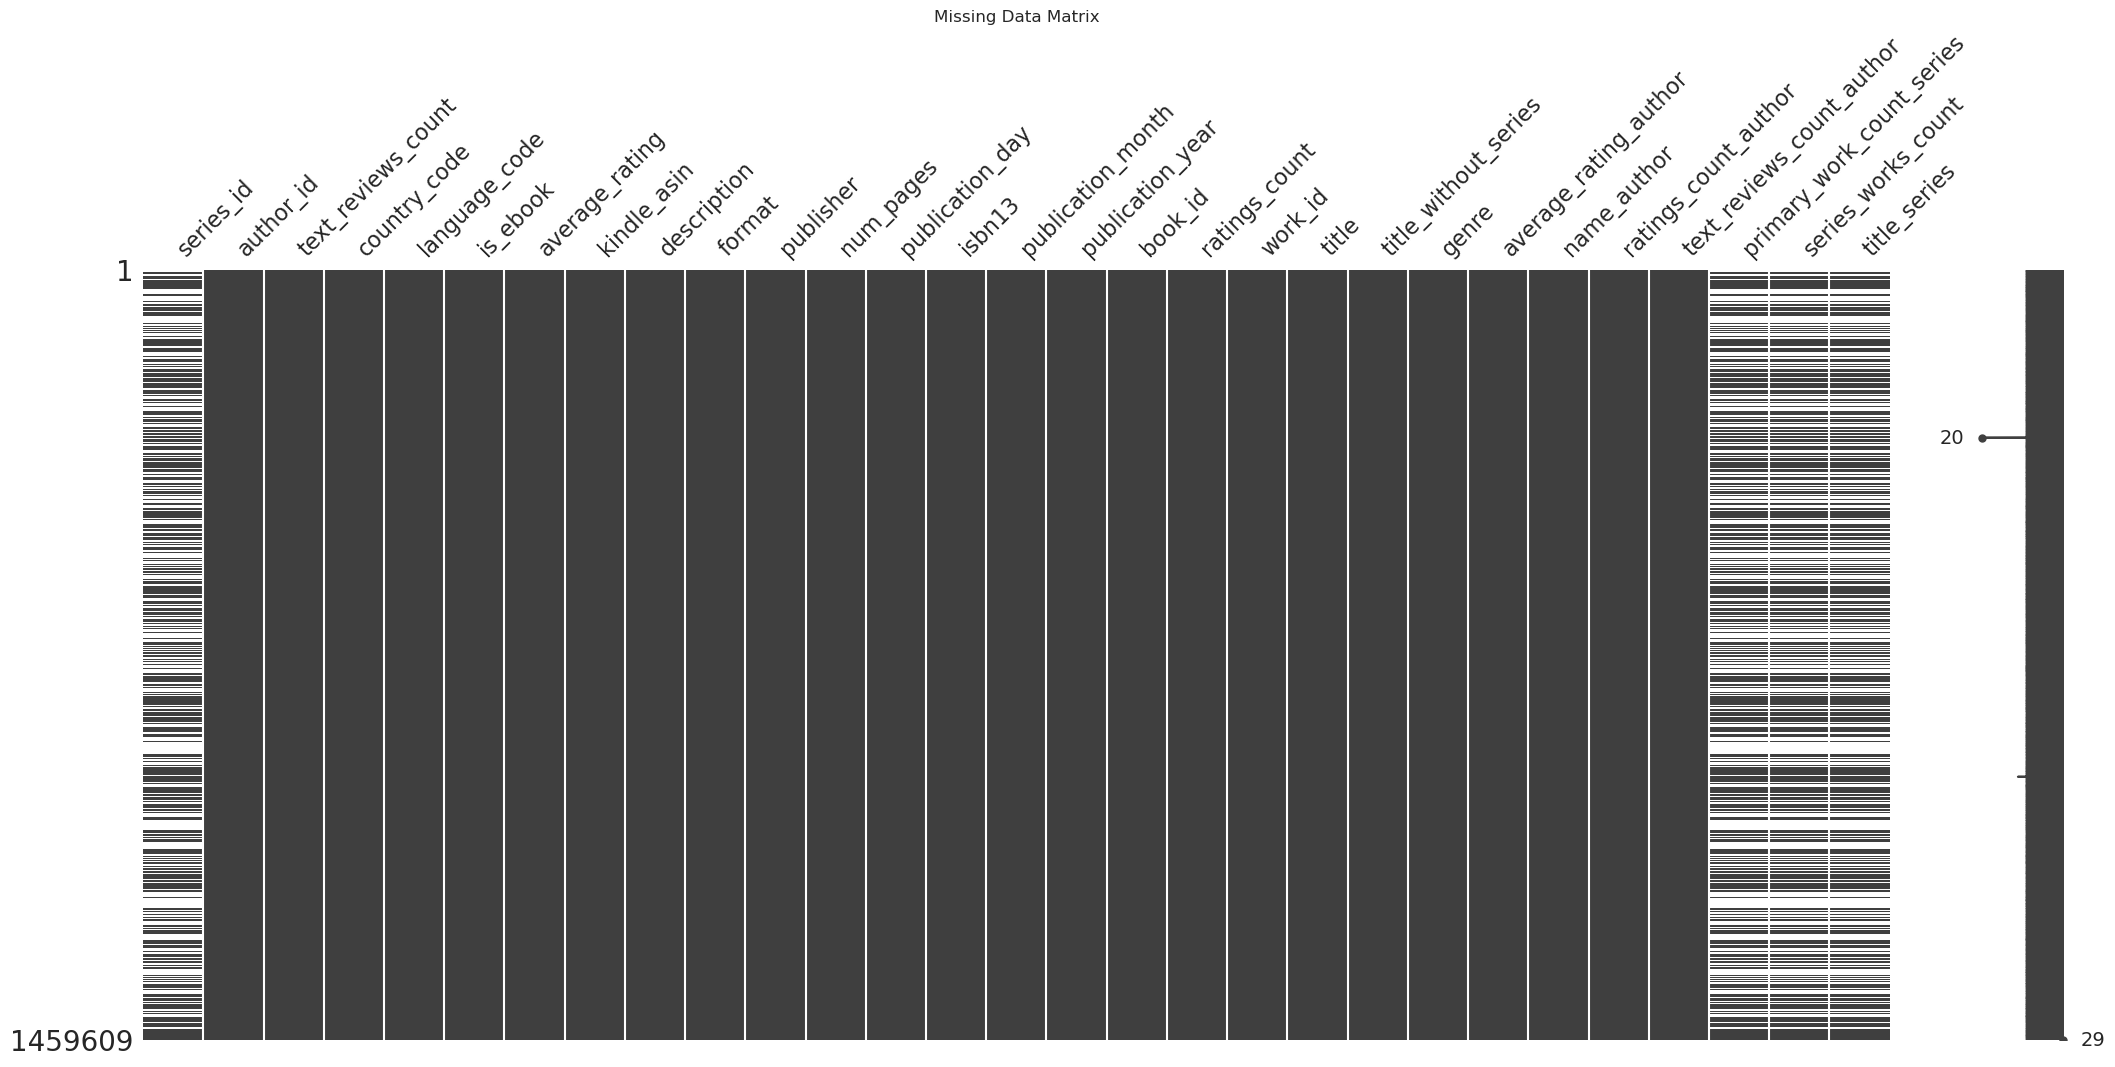

In [68]:
import missingno as msno
import matplotlib.pyplot as plt
books_pd = books.toPandas()

msno.matrix(books_pd)
plt.title("Missing Data Matrix")
plt.show()


The missing-data matrix shows that many columns have irregular or incomplete values, especially in author- and series-related fields. Because of this, we chose not to immediately convert string-type numeric fields or drop rows with nulls. Keeping the original values lets us avoid losing data too early and understand the missing-data patterns first, before deciding which features to clean or remove during later feature-selection and modeling steps.

After merging and cleaning the original Goodreads datasets (books, authors, and series), we obtained a consolidated dataset that combines key information from all three sources. The resulting data includes detailed metadata about each book, its corresponding author, and the related series, allowing for more comprehensive analysis of relationships such as author productivity, series popularity, and book-level features. An excerpt of the final schema is shown in the table below.

| **Feature Name**               | **Description**                                               | **Data Type**                |
|--------------------------------|--------------------------------------------------------------|------------------------------|
| **series_id**                  | Unique identifier for the book series                       | String                      |
| **author_id**                  | Unique identifier for the author                             | String                      |
| **text_reviews_count**         | Number of text reviews written for the book                  | String             |
| **country_code**               | Country code associated with the book’s edition              | String                      |
| **language_code**              | Language code of the book (e.g., 'eng', 'spa')               | String                      |
| **is_ebook**                   | Indicates whether the book is an eBook (True/False as string) | String (Boolean-like)       |
| **average_rating**             | Average rating score of the book                             | String             |
| **kindle_asin**                | Kindle-specific ASIN code                                    | String                      |
| **description**                | Textual description or synopsis of the book                  | String                      |
| **format**                     | Physical or digital format (e.g., Paperback, Hardcover, eBook) | String                    |
| **publisher**                  | Name of the publishing company                               | String                      |
| **num_pages**                  | Total number of pages in the book                            | String             |
| **publication_day**            | Day of publication (if available)                            | String             |
| **isbn13**                     | 13-digit version of the ISBN identifier                      | String                      |
| **publication_month**          | Month of publication (if available)                          | String             |
| **publication_year**           | Year the book was published                                  | String            |
| **book_id**                    | Unique internal Goodreads ID for the book                    | String                      |
| **ratings_count**              | Total number of user ratings                                 | String            |
| **work_id**                    | ID of the parent “work” that groups all editions of the same title | String                 |
| **title**                      | Full title of the book, including series if present           | String                      |
| **title_without_series**       | Title of the book excluding any series information            | String                      |
| **genre**                      | Main genre or category assigned to the book                  | String                      |
| **average_rating_author**      | Average rating score across all books by the same author      | String             |
| **name_author**                | Name of the author                                            | String                      |
| **ratings_count_author**       | Total number of user ratings across all books by the author   | String              |
| **text_reviews_count_author**  | Total number of text reviews written for all books by the author | String          |
| **primary_work_count_series**  | Number of primary works within the series                    | String            |
| **series_works_count**         | Total number of works in the series                          | String            |
| **title_series**               | Title of the series                                           | String                      |


# **RUN FROM HERE DOWN**

## **Feature Engineering**

### preparing reviews data for ML

Because the reviews dataset is extremely large, loading it together with the other datasets significantly increases memory usage and can easily cause the computing environment to run out of memory or crash. To ensure stability and avoid memory issues, we process and prepar the reviews dataset separately before merging it with the other datasets for further analysis.

In [ ]:
# reviews = spark.read.json('gs://qst843-team01-project/notebooks/jupyter/raw_data/goodreads_reviews_dedup.json.gz')

load the raw reviews dataset directly from the compressed JSON file.

In [ ]:
#reviews.write.mode("overwrite").parquet("gs://qst843-team01-project/notebooks/jupyter/data/books_reviews_parquet/")

We convert the raw reviews dataset to Parquet format to improve storage efficiency and loading speed, preparing it for the subsequent cleaning and preprocessing steps.

In [9]:
# reviews = spark.read.parquet("gs://qst843-team01-project/notebooks/jupyter/data/books_reviews_parquet/").repartition(40)

reviews = spark.read.parquet("gs://qst843-team01-project/notebooks/jupyter/data/books_reviews_parquet/")
reviews.show(2)

+--------+--------------------+--------------------+----------+-------+------+--------------------+--------------------+--------------------+--------------------+--------------------+
| book_id|          date_added|        date_updated|n_comments|n_votes|rating|             read_at|           review_id|         review_text|          started_at|             user_id|
+--------+--------------------+--------------------+----------+-------+------+--------------------+--------------------+--------------------+--------------------+--------------------+
|24375664|Fri Aug 25 13:55:...|Mon Oct 09 08:55:...|         0|     16|     5|Sat Oct 07 00:00:...|5cd416f3efc3f944f...|Mind blowingly co...|Sat Aug 26 00:00:...|8842281e1d1347389...|
|18245960|Sun Jul 30 07:44:...|Wed Aug 30 00:00:...|         1|     28|     5|Sat Aug 26 12:05:...|dfdbb7b0eb5a7e4c2...|This is a special...|Tue Aug 15 13:23:...|8842281e1d1347389...|
+--------+--------------------+--------------------+----------+-------+------+--

We load the reviews dataset from the Parquet file, which provides faster and more efficient access for the upcoming cleaning steps.

In [10]:
reviews.printSchema()

root
 |-- book_id: string (nullable = true)
 |-- date_added: string (nullable = true)
 |-- date_updated: string (nullable = true)
 |-- n_comments: long (nullable = true)
 |-- n_votes: long (nullable = true)
 |-- rating: long (nullable = true)
 |-- read_at: string (nullable = true)
 |-- review_id: string (nullable = true)
 |-- review_text: string (nullable = true)
 |-- started_at: string (nullable = true)
 |-- user_id: string (nullable = true)



We inspect the schema to understand the structure and data types of the loaded reviews dataset.

In [11]:
from pyspark.sql.functions import to_timestamp
#GenAI Supported Code Start
from pyspark.sql.functions import regexp_replace, to_timestamp

# Drop the unwanted columns
cols_to_drop = ["date_updated", "n_comments", "review_text", "started_at"]
reviews_clean = reviews.drop(*cols_to_drop)

spark.conf.set("spark.sql.legacy.timeParserPolicy", "LEGACY")

# Remove the timezone offset (space + 5 chars + space)
# Pattern: space + "-" or "+" + 4 digits (e.g., " -0700 "), replaced by a single space
pattern = r" [+-]\d{4} "
replacement = " "

reviews_clean = reviews_clean.withColumn(
    "date_added_clean", regexp_replace("date_added", pattern, " ")
).withColumn(
    "read_at_clean", regexp_replace("read_at", pattern, " ")
)

date_format = "EEE MMM dd HH:mm:ss yyyy" 

reviews_clean = reviews_clean.withColumn(
    "date_added_ts", to_timestamp("date_added_clean", date_format)
).withColumn(
    "read_at_ts", to_timestamp("read_at_clean", date_format)
)

reviews_clean.printSchema()

root
 |-- book_id: string (nullable = true)
 |-- date_added: string (nullable = true)
 |-- n_votes: long (nullable = true)
 |-- rating: long (nullable = true)
 |-- read_at: string (nullable = true)
 |-- review_id: string (nullable = true)
 |-- user_id: string (nullable = true)
 |-- date_added_clean: string (nullable = true)
 |-- read_at_clean: string (nullable = true)
 |-- date_added_ts: timestamp (nullable = true)
 |-- read_at_ts: timestamp (nullable = true)



We remove unnecessary columns and clean the date fields by stripping timezone offsets and converting them into standardized timestamp formats, ensuring consistent and usable temporal data for analysis.

In [12]:
columns_to_drop = ["date_added", "read_at", "date_added_clean", "read_at_clean"]

reviews_final = reviews_clean.drop(*columns_to_drop)

# View the new schema
reviews_final.printSchema()
reviews_final.show(5)

root
 |-- book_id: string (nullable = true)
 |-- n_votes: long (nullable = true)
 |-- rating: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- user_id: string (nullable = true)
 |-- date_added_ts: timestamp (nullable = true)
 |-- read_at_ts: timestamp (nullable = true)

+--------+-------+------+--------------------+--------------------+-------------------+-------------------+
| book_id|n_votes|rating|           review_id|             user_id|      date_added_ts|         read_at_ts|
+--------+-------+------+--------------------+--------------------+-------------------+-------------------+
|24375664|     16|     5|5cd416f3efc3f944f...|8842281e1d1347389...|2017-08-25 13:55:02|2017-10-07 00:00:00|
|18245960|     28|     5|dfdbb7b0eb5a7e4c2...|8842281e1d1347389...|2017-07-30 07:44:10|2017-08-26 12:05:52|
| 6392944|      6|     3|5e212a62bced17b4d...|8842281e1d1347389...|2017-07-24 02:48:17|2017-07-25 00:00:00|
|22078596|     22|     4|fdd13cad0695656be...|8842281e1d13473

We drop the original and intermediate date columns, keeping only the cleaned timestamp fields in the final dataset.

In [13]:
from pyspark.sql.functions import col

# Select only a subset of books columns for join
books_selected = books.select(
    "book_id",
    "publication_day",
    "publication_month",
    "publication_year",
    "title",
    "title_without_series",
    "genre"
)

# Left Join
joined_reviews = reviews_final.join(
    books_selected,
    on="book_id",
    how="left"
)

We first select only the relevant columns from the books dataset, then perform a left join on book_id so that each review is enriched with the book’s publication details, title information, and genre.

In [14]:
# Show resulting schema and a sample
joined_reviews.printSchema()
joined_reviews.show(2)

root
 |-- book_id: string (nullable = true)
 |-- n_votes: long (nullable = true)
 |-- rating: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- user_id: string (nullable = true)
 |-- date_added_ts: timestamp (nullable = true)
 |-- read_at_ts: timestamp (nullable = true)
 |-- publication_day: string (nullable = true)
 |-- publication_month: string (nullable = true)
 |-- publication_year: string (nullable = true)
 |-- title: string (nullable = true)
 |-- title_without_series: string (nullable = true)
 |-- genre: string (nullable = true)



+--------+-------+------+--------------------+--------------------+-------------------+-------------------+---------------+-----------------+----------------+---------------+--------------------+--------------------+
| book_id|n_votes|rating|           review_id|             user_id|      date_added_ts|         read_at_ts|publication_day|publication_month|publication_year|          title|title_without_series|               genre|
+--------+-------+------+--------------------+--------------------+-------------------+-------------------+---------------+-----------------+----------------+---------------+--------------------+--------------------+
|11367726|      0|     2|e6bd5df73f73ca187...|ceb6c02f29855c1ad...|2012-04-15 08:31:49|2012-04-12 00:00:00|             31|                1|            2012|Defending Jacob|     Defending Jacob|mystery_thriller_...|
|11701123|      0|     4|8ed1c7870a42c3715...|d062e5983d4c0b571...|2011-06-12 15:26:59|2011-06-17 00:00:00|           NULL|         

We inspect the joined dataset by printing the schema and displaying a sample of rows.

In [15]:
from pyspark.sql.functions import lpad, concat_ws, to_date

# Make sure day and month are 2-digits, then concatenate in yyyy-MM-dd format
joined_reviews = joined_reviews.withColumn(
    "publication_date",
    to_date(
        concat_ws('-',
            col("publication_year").cast("string"),
            lpad(col("publication_month").cast("string"), 2, '0'),
            lpad(col("publication_day").cast("string"), 2, '0')
        ),
        "yyyy-MM-dd"
    )
)

We construct a proper publication_date column by padding the day and month to two digits and concatenating the year, month, and day into a standard yyyy-MM-dd date format.

In [16]:
# Show results
reviews_with_books = joined_reviews.filter(col("publication_date").isNotNull())

We filter out records without a valid publication date to ensure that each review is linked to a book with complete publication information, improving data quality for later analysis and modeling.

In [17]:
from pyspark.sql.functions import current_timestamp, date_sub, col

# Calculate range for last 10 years (approx. 10 years = 3652 days, accounting for leap years)
ten_years_ago = date_sub(current_timestamp(), 3652)
now = current_timestamp()

ten_yrs_books_and_reviews = reviews_with_books.filter(
    (col("publication_date") >= ten_years_ago) &
    (col("publication_date") <= now)&
    (col("date_added_ts") >= ten_years_ago) &
    (col("date_added_ts") <= now)
)

We restrict the dataset to books published and reviews written within the last ten years, ensuring that the data used for downstream machine learning tasks is recent, consistent, and free from outdated records.

In [18]:
ten_yrs_books_and_reviews.printSchema()
ten_yrs_books_and_reviews.show(2)

root
 |-- book_id: string (nullable = true)
 |-- n_votes: long (nullable = true)
 |-- rating: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- user_id: string (nullable = true)
 |-- date_added_ts: timestamp (nullable = true)
 |-- read_at_ts: timestamp (nullable = true)
 |-- publication_day: string (nullable = true)
 |-- publication_month: string (nullable = true)
 |-- publication_year: string (nullable = true)
 |-- title: string (nullable = true)
 |-- title_without_series: string (nullable = true)
 |-- genre: string (nullable = true)
 |-- publication_date: date (nullable = true)



+--------+-------+------+--------------------+--------------------+-------------------+-------------------+---------------+-----------------+----------------+--------------------+--------------------+-------+----------------+
| book_id|n_votes|rating|           review_id|             user_id|      date_added_ts|         read_at_ts|publication_day|publication_month|publication_year|               title|title_without_series|  genre|publication_date|
+--------+-------+------+--------------------+--------------------+-------------------+-------------------+---------------+-----------------+----------------+--------------------+--------------------+-------+----------------+
|30739547|      1|     5|d3b2b3ed6bd8b3861...|65d3b49e7e4d1248f...|2017-01-24 13:25:49|2016-10-26 00:00:00|             25|               10|            2016|Preppy: The Life ...|Preppy: The Life ...|romance|      2016-10-25|
|30739547|      0|     5|6f85021e5fce22ce7...|6d66c3514fd5c9fad...|2017-10-12 05:19:22|         

We check the schema and preview sample rows to verify that the filtered dataset has been correctly prepared for further machine learning analysis.

In [19]:
output_path = "gs://qst843-team01-project/notebooks/jupyter/data/ten_yrs_books_and_reviews_parquet/"

ten_yrs_books_and_reviews.repartition(10).write.mode("overwrite").parquet(output_path)

We save the final filtered dataset in Parquet format, using repartitioning to optimize storage and ensure efficient loading for subsequent machine learning workflows.

In [20]:
ten_yrs_books_and_reviews = spark.read.parquet("gs://qst843-team01-project/notebooks/jupyter/data/ten_yrs_books_and_reviews_parquet/")

ten_yrs_books_and_reviews.printSchema()
ten_yrs_books_and_reviews.show(5)

root
 |-- book_id: string (nullable = true)
 |-- n_votes: long (nullable = true)
 |-- rating: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- user_id: string (nullable = true)
 |-- date_added_ts: timestamp (nullable = true)
 |-- read_at_ts: timestamp (nullable = true)
 |-- publication_day: string (nullable = true)
 |-- publication_month: string (nullable = true)
 |-- publication_year: string (nullable = true)
 |-- title: string (nullable = true)
 |-- title_without_series: string (nullable = true)
 |-- genre: string (nullable = true)
 |-- publication_date: date (nullable = true)

+--------+-------+------+--------------------+--------------------+-------------------+-------------------+---------------+-----------------+----------------+--------------------+--------------------+------------------+----------------+
| book_id|n_votes|rating|           review_id|             user_id|      date_added_ts|         read_at_ts|publication_day|publication_month|publication_yea

We load the prepared ten-year dataset from Parquet and inspect its schema and sample rows to confirm that it is ready for analysis and modeling.

In [21]:
from pyspark.sql import functions as F

# Filter out rows without valid publication_date or review timestamp
ten_yrs_books_and_reviews = ten_yrs_books_and_reviews.filter(
    F.col("publication_date").isNotNull() &
    F.col("date_added_ts").isNotNull()
)

# Compute months since publication and "published # days ago"
ten_yrs_books_and_reviews = (
    ten_yrs_books_and_reviews
    .withColumn(
        "months_since_pub",
        F.months_between(F.to_date("date_added_ts"), F.col("publication_date"))
    )
    .withColumn(
        "published_days_ago",
        F.datediff(F.current_date(), F.col("publication_date"))
    )
)

# Define time windows and build aggregation expressions
windows = [3, 6, 9, 12, 18, 24, 36, 48, 60, 120]
aggs = []
for m in windows:
    cond = (F.col("months_since_pub") >= 0) & (F.col("months_since_pub") <= m)
    aggs += [
        F.sum(F.when(cond, 1).otherwise(0)).alias(f"review_count_{m}m"),
        F.avg(F.when(cond, F.col("rating"))).alias(f"avg_rating_{m}m")
    ]

# Group by book_id, title, and genre, and carry publication_date info
agg_exprs = [
    F.first("publication_date").alias("publication_date"),
    F.first("published_days_ago").alias("published_days_ago"),
    *aggs
]

time_window_summary = (
    ten_yrs_books_and_reviews
    .groupBy("book_id", "title", "genre")
    .agg(*agg_exprs))


We prepare the dataset for modeling by filtering out rows with missing dates, computing how long each book has been published, and generating time-window features. Specifically, we calculate review counts and average ratings within multiple time windows (3 to 120 months), and then aggregate these statistics at the book level to create a summary table suitable for downstream machine learning analysis.

In [22]:
# Optional: preview results
time_window_summary.printSchema()
time_window_summary.show(5, truncate=False)

root
 |-- book_id: string (nullable = true)
 |-- title: string (nullable = true)
 |-- genre: string (nullable = true)
 |-- publication_date: date (nullable = true)
 |-- published_days_ago: integer (nullable = true)
 |-- review_count_3m: long (nullable = true)
 |-- avg_rating_3m: double (nullable = true)
 |-- review_count_6m: long (nullable = true)
 |-- avg_rating_6m: double (nullable = true)
 |-- review_count_9m: long (nullable = true)
 |-- avg_rating_9m: double (nullable = true)
 |-- review_count_12m: long (nullable = true)
 |-- avg_rating_12m: double (nullable = true)
 |-- review_count_18m: long (nullable = true)
 |-- avg_rating_18m: double (nullable = true)
 |-- review_count_24m: long (nullable = true)
 |-- avg_rating_24m: double (nullable = true)
 |-- review_count_36m: long (nullable = true)
 |-- avg_rating_36m: double (nullable = true)
 |-- review_count_48m: long (nullable = true)
 |-- avg_rating_48m: double (nullable = true)
 |-- review_count_60m: long (nullable = true)
 |-- avg_

25/12/08 18:07:04 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+--------+-------------------------------------+--------------+----------------+------------------+---------------+------------------+---------------+------------------+---------------+------------------+----------------+------------------+----------------+------------------+----------------+------------------+----------------+------------------+----------------+------------------+----------------+------------------+-----------------+------------------+
|book_id |title                                |genre         |publication_date|published_days_ago|review_count_3m|avg_rating_3m     |review_count_6m|avg_rating_6m     |review_count_9m|avg_rating_9m     |review_count_12m|avg_rating_12m    |review_count_18m|avg_rating_18m    |review_count_24m|avg_rating_24m    |review_count_36m|avg_rating_36m    |review_count_48m|avg_rating_48m    |review_count_60m|avg_rating_60m    |review_count_120m|avg_rating_120m   |
+--------+-------------------------------------+--------------+----------------+----

We preview the schema and a few sample rows to verify that the time-window summary table was generated correctly.

In [23]:
time_window_summary.write.mode("overwrite").parquet("gs://qst843-team01-project/notebooks/jupyter/data/time_window_summary_parquet/")

We save the final time-window summary table in Parquet format to enable efficient storage and fast loading for downstream analysis and modeling.

## **Exploratory Data Analysis**

In [24]:
books = spark.read.parquet("gs://qst843-team01-project/notebooks/jupyter/data/books_cleaned_parquet/")
time_window_summary = spark.read.parquet("gs://qst843-team01-project/notebooks/jupyter/data/time_window_summary_parquet/")

Reloading prepared data for exploratory data analysis

### Q1: What is the distribution of average ratings and ratings count across all books?

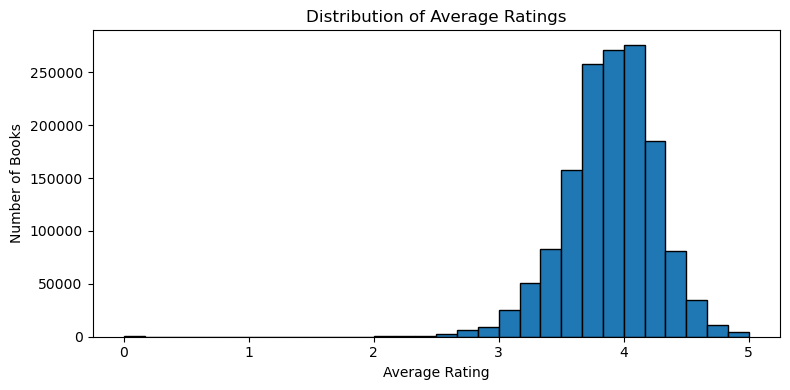

In [25]:
import seaborn as sns
from pyspark.sql import SparkSession, functions as F
import matplotlib.pyplot as plt

ratings = books.select("average_rating").dropna().toPandas()
ratings["average_rating"] = ratings["average_rating"].astype(float)

plt.figure(figsize=(8,4))
plt.hist(ratings["average_rating"], bins=30, edgecolor="black")
plt.title("Distribution of Average Ratings")
plt.xlabel("Average Rating")
plt.ylabel("Number of Books")
plt.tight_layout()
plt.show()

**Finding**: The chart shows that most books have average ratings between 3.5 and 4.5, with a clear peak around 4.0, indicating generally positive reader feedback. Very few books receive ratings below 3 or above 4.8, suggesting that users on Goodreads tend to rate books favorably rather than critically. Overall, the distribution is slightly left-skewed, reflecting a consistent tendency toward higher ratings and generally positive reader satisfaction across the dataset.

### Q2: What Do Ratings and Historical Publishing Patterns Reveal About Genre Popularity?

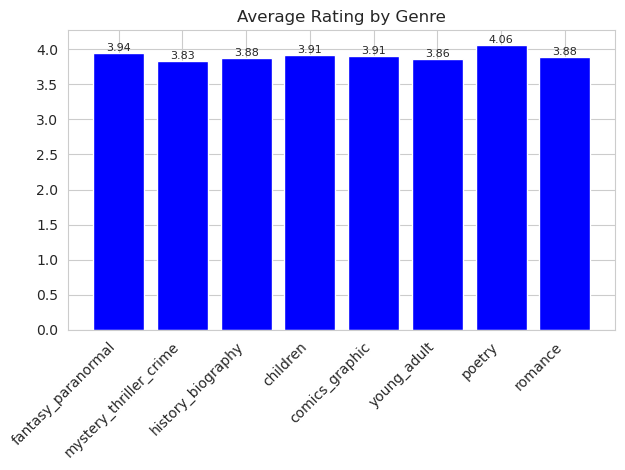

In [26]:
sns.set_style("whitegrid")

genre_avg = books.groupBy("genre").agg(F.avg("average_rating").alias("avg")).toPandas()
genre_avg["avg"] = genre_avg["avg"].astype(float)
bars = plt.bar(genre_avg["genre"], genre_avg["avg"], color="blue")
for b in bars:
    plt.text(b.get_x()+b.get_width()/2, b.get_height(), f"{b.get_height():.2f}", ha="center", va="bottom", fontsize=8)
plt.title("Average Rating by Genre")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

**Finding**: Across all genres, reader ratings show very little variation, with most categories clustered tightly between 3.8 and 4.0. This suggests that Goodreads users tend to rate books fairly positively overall. However, there are still small but meaningful differences: Poetry stands out with the highest average rating (around 4.06), indicating stronger and more consistent reader appreciation, while Mystery/Thriller/Crime has the lowest (about 3.83), possibly reflecting wider variation in quality within the genre. Other genres such as Fantasy, Children’s, Young Adult, and Romance all fall within a narrow and stable range (3.86–3.94). Overall, the findings suggest that genre has only a modest influence on average ratings, and readers may be making more nuanced judgments based on elements within each genre rather than the genre itself.

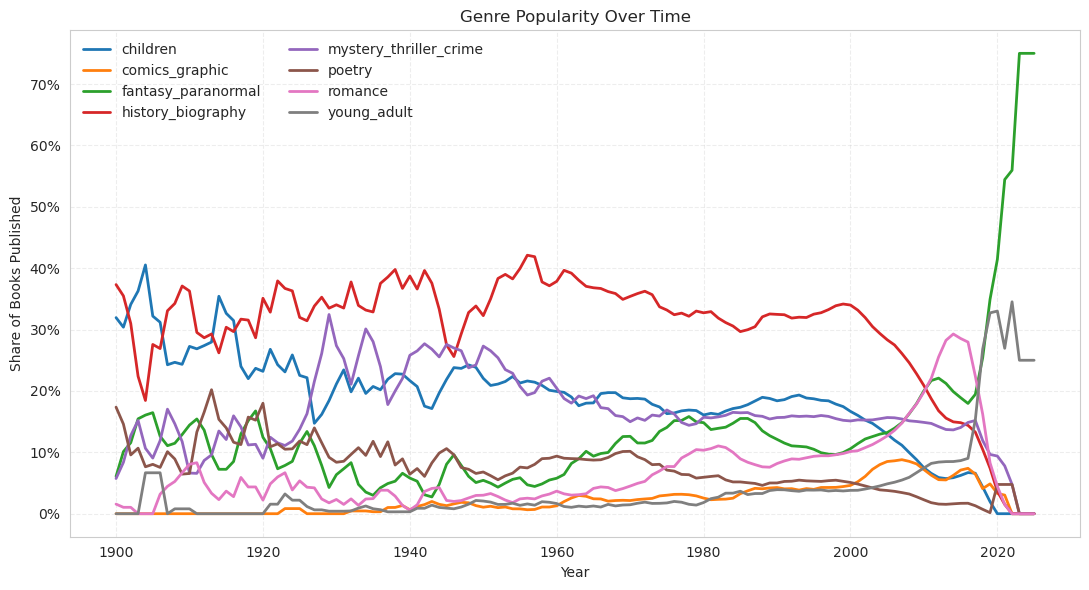

In [27]:
from pyspark.sql import functions as F, Window
from pyspark.sql.types import IntegerType, FloatType
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

year_exprs=[]
if "publication_year" in books.columns:
    year_exprs.append(F.regexp_extract(F.col("publication_year").cast("string"), r"(\d{4})", 1))
if "year" in books.columns:
    year_exprs.append(F.regexp_extract(F.col("year").cast("string"), r"(\d{4})", 1))
year_expr = F.coalesce(*year_exprs).cast(IntegerType())

num_cols=["average_rating","ratings_count","text_reviews_count","num_pages","average_rating_author","ratings_count_author","text_reviews_count_author"]
num_select=[F.col(c).cast(FloatType()).alias(c) for c in num_cols if c in books.columns]

base_df=(books.select(year_expr.alias("year"),F.lower(F.col("genre")).alias("genre_raw"),*num_select)
         .where((F.col("year")>=1900)&(F.col("year")<=2025)))

exploded=base_df.select("year",
                        F.explode(F.split(F.regexp_replace(F.col("genre_raw"),r"[;|/]",","),r"\s*,\s*")).alias("g"))
genre_df=exploded.withColumn("genre",F.trim(F.col("g"))).where(F.col("genre")!="").select("year","genre")

year_genre=genre_df.groupBy("year","genre").agg(F.count("*").alias("cnt"))
year_tot=year_genre.groupBy("year").agg(F.sum("cnt").alias("year_total"))
year_genre=year_genre.join(year_tot,"year").withColumn("share",F.col("cnt")/F.col("year_total"))
top_genres=year_genre.groupBy("genre").agg(F.sum("cnt").alias("total_cnt")).orderBy(F.desc("total_cnt")).limit(8)
viz_df=year_genre.join(top_genres,"genre","inner")

pdf=viz_df.select("year","genre","share").toPandas()
pivot=pdf.pivot_table(index="year",columns="genre",values="share",aggfunc="sum").fillna(0).sort_index()

plt.figure(figsize=(11,6))
for c in pivot.columns:
    y=pivot[c].rolling(3,min_periods=1,center=True).mean()
    plt.plot(pivot.index,y,linewidth=2,label=c)
plt.title("Genre Popularity Over Time")
plt.xlabel("Year"); plt.ylabel("Share of Books Published")
plt.grid(True,linestyle="--",alpha=0.35)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))
plt.legend(loc="upper left",ncol=2,frameon=False)
plt.tight_layout(); plt.show()


**Finding**: The chart shows how the popularity of major literary genres has evolved from 1900 to 2025. In the early 1900s, history and biography, along with children’s books, were the most common, reflecting readers’ focus on education and family storytelling. By the mid-20th century, mystery, thriller, and romance titles gained ground as mass-market publishing expanded and leisure reading became more widespread. Since the 2000s, fantasy and young adult fiction have risen sharply, while traditional genres have gradually declined. Overall, the trend points to a generational shift toward imaginative, character-driven stories and the growing dominance of speculative fiction in modern reading culture

### Q3: Are there author-related features that correlate with book popularity?

In [28]:
from pyspark.sql import functions as F
from pyspark.sql.functions import col, regexp_extract, when


df_auth = books.select(
    "name_author",
    "average_rating_author",
    "average_rating",
    "ratings_count_author"
)

def to_double_from_str(colname):
    return when(
        regexp_extract(col(colname), r"(\d+(\.\d+)?)", 0) != "",
        regexp_extract(col(colname), r"(\d+(\.\d+)?)", 0).cast("double")
    ).otherwise(None)

df_auth = (
    df_auth
    .withColumn("average_rating_author", to_double_from_str("average_rating_author"))
    .withColumn("average_rating", col("average_rating").cast("double"))
    .withColumn("ratings_count_author", to_double_from_str("ratings_count_author"))
)

df_auth = df_auth.dropna(subset=["name_author", "average_rating_author", "average_rating", "ratings_count_author"])
print("Usable rows for author analysis:", df_auth.count())

Usable rows for author analysis: 1459607


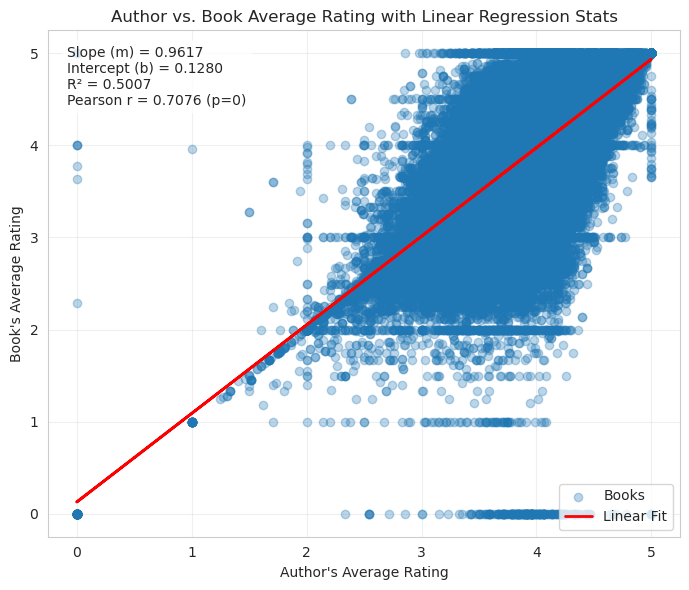

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

pdf_scatter = df_auth.toPandas()
x = pdf_scatter["average_rating_author"].astype(float)
y = pdf_scatter["average_rating"].astype(float)

m, b = np.polyfit(x, y, 1)
y_pred = m * x + b

ss_res = np.sum((y - y_pred)**2)
ss_tot = np.sum((y - np.mean(y))**2)
r2 = 1 - ss_res / ss_tot

corr, p_val = pearsonr(x, y)

plt.figure(figsize=(7, 6))
plt.scatter(x, y, alpha=0.3, label="Books")
plt.plot(x, y_pred, color="red", linewidth=2, label="Linear Fit")

textstr = (
    f"Slope (m) = {m:.4f}\n"
    f"Intercept (b) = {b:.4f}\n"
    f"R² = {r2:.4f}\n"
    f"Pearson r = {corr:.4f} (p={p_val:.4g})"
)

plt.gca().text(
    0.03, 0.97, textstr,
    transform=plt.gca().transAxes,
    fontsize=10,
    verticalalignment='top',
    bbox=dict(boxstyle="round", facecolor="white", alpha=0.8)
)

plt.legend(loc="lower right")

plt.xlabel("Author's Average Rating")
plt.ylabel("Book's Average Rating")
plt.title("Author vs. Book Average Rating with Linear Regression Stats")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


**Finding**: The analysis shows a moderately strong positive relationship between an author's average rating and the average rating of their individual books. The Pearson correlation is r = 0.71, indicating that authors who are generally well-rated tend to produce books that also receive higher ratings. The linear regression line reinforces this pattern, with a slope of 0.96, suggesting that each one-point increase in an author’s average rating corresponds to nearly a one-point increase in the expected rating of their books. The model explains about 50% of the variance (R² = 0.50), which is substantial in a real-world dataset with high rating noise. Overall, the result suggests that author reputation is one of the strongest predictors of book-level reader ratings.

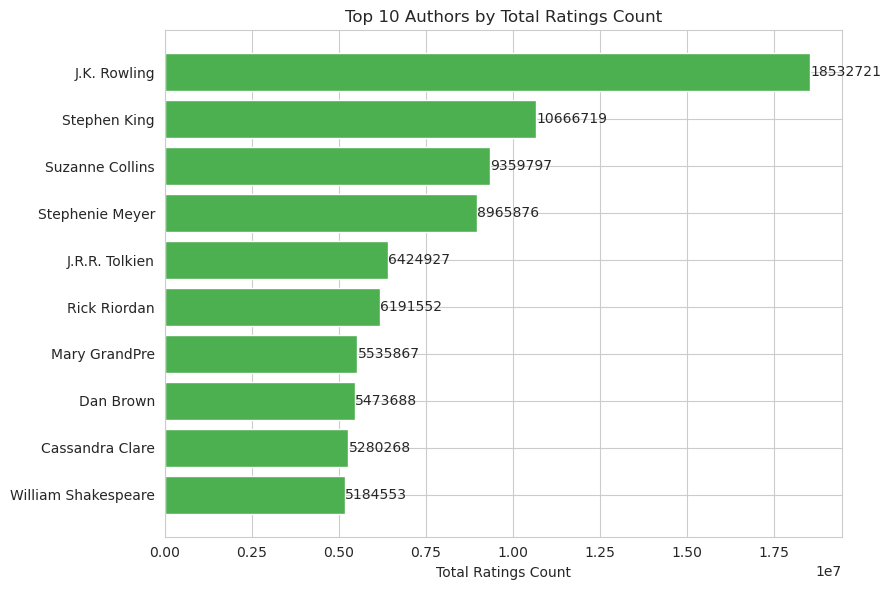

In [15]:
from pyspark.sql import functions as F
import matplotlib.pyplot as plt

df_top = (
    books
    .select("name_author", "ratings_count_author")
    .withColumn(
        "ratings_count_author",
        F.regexp_extract(F.col("ratings_count_author"), r"(\d+)", 1).cast("double")
    )
    .dropna(subset=["name_author", "ratings_count_author"])
    .groupBy("name_author")
    .agg(F.max("ratings_count_author").alias("total_ratings_author"))
    .orderBy(F.col("total_ratings_author").desc())
    .limit(10)
)

pdf = df_top.toPandas().sort_values("total_ratings_author", ascending=True)

plt.figure(figsize=(9, 6))
bars = plt.barh(pdf["name_author"], pdf["total_ratings_author"], color="#4CAF50")

for i, v in enumerate(pdf["total_ratings_author"]):
    plt.text(v + 5000, i, f"{int(v)}", va="center")

plt.xlabel("Total Ratings Count")
plt.title("Top 10 Authors by Total Ratings Count")
plt.tight_layout()
plt.show()


**Finding**: The popularity analysis reveals that a small group of highly influential authors account for a disproportionate share of total reader engagement. J.K. Rowling leads by a wide margin with over 18 million ratings, far surpassing all other authors in the dataset. Stephen King, Suzanne Collins, and Stephenie Meyer also show extremely high engagement, each accumulating between 9–10 million ratings, reflecting their strong cultural impact and large reader bases. Classic and fantasy authors such as J.R.R. Tolkien and contemporary young-adult writers like Rick Riordan also rank among the top contributors. Overall, this distribution highlights a strong winner-takes-most pattern, where a few blockbuster authors dominate rating activity across the platform.

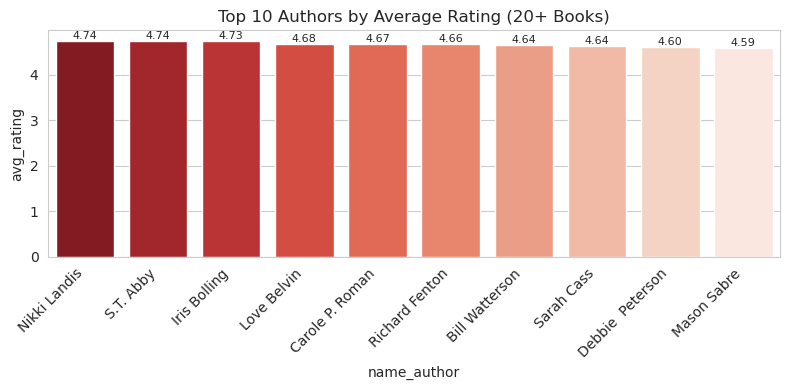

In [18]:
author_avg = (books.groupBy("name_author")
                     .agg(F.avg("average_rating").alias("avg_rating"),
                          F.count("*").alias("book_count"))
                     .filter(F.col("book_count") >= 20)
                     .orderBy(F.desc("avg_rating"))
                     .limit(10)
                     .toPandas())
author_avg["avg_rating"] = author_avg["avg_rating"].astype(float)

sns.set_style("whitegrid")
plt.figure(figsize=(8,4))
ax = sns.barplot(data=author_avg, x="name_author", y="avg_rating",
                 hue="name_author", palette="Reds_r", legend=False)

for c in ax.containers:
    ax.bar_label(c, fmt="%.2f", label_type="edge", fontsize=8)

plt.title("Top 10 Authors by Average Rating (20+ Books)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

**Finding**: When focusing on authors who have published at least 20 books, a different pattern emerges compared to overall popularity. The highest-rated authors are not necessarily the ones with the largest audiences, but rather consistent niche performers with very strong reader approval. Writers like Nikki Landis, S.T. Abby, and Iris Bolling lead the list with exceptionally high average ratings around 4.7+, indicating strong loyalty among their readers. Even the authors at the bottom of the top-10 still hold ratings above 4.5, suggesting that sustained high ratings across many books is relatively rare and signals stable quality. This highlights that author popularity (ratings count) and author quality (average rating) are related but distinct dimensions of success.

### Q4: How do early review counts (first 3, 6, 9 months) correlate with future review totals (at 36, 60, 120 months)?

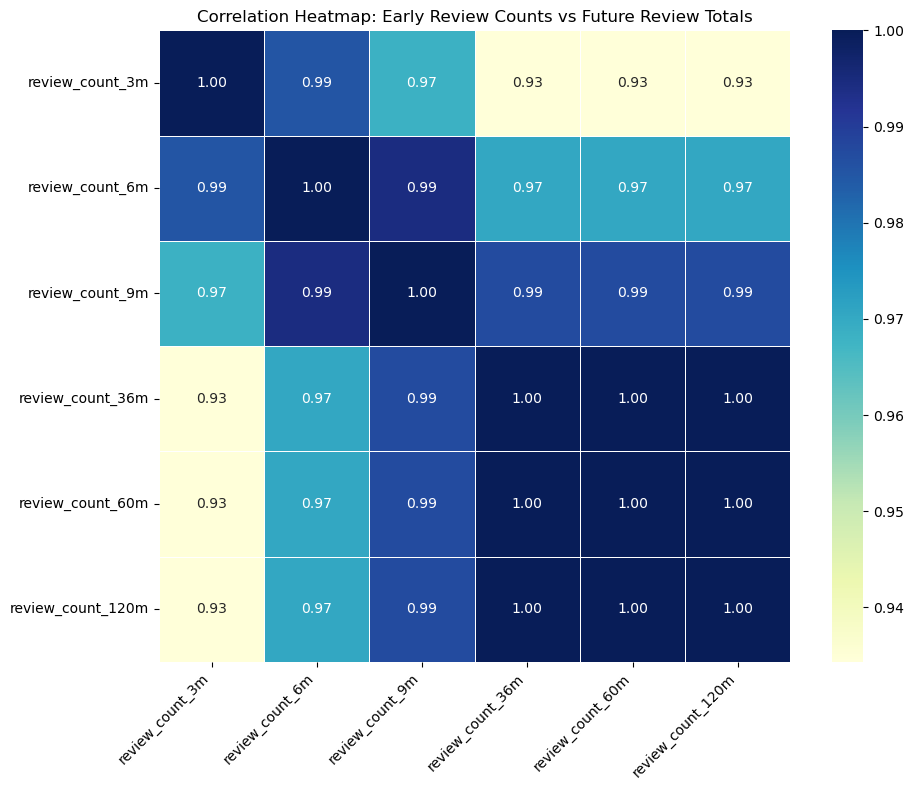

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql import functions as F

corr_cols = [
    "review_count_3m",
    "review_count_6m",
    "review_count_9m",
    "review_count_36m",
    "review_count_60m",
    "review_count_120m"
]

df_corr = time_window_summary.select(corr_cols)
pdf = df_corr.toPandas()
corr_matrix = pdf.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",
    linewidths=0.5,
    square=True
)

plt.title("Correlation Heatmap: Early Review Counts vs Future Review Totals")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


**Finding:**
The heatmap reveals extremely strong correlations between early review counts (3–12 months) and long-term review totals (36–120 months), with coefficients ranging from 0.93 to 0.99. Beyond indicating strong predictive power, this pattern also highlights a structural characteristic of Goodreads review dynamics: long-term review accumulation is minimal. The near-perfect correlations among 36m, 60m, and 120m counts (r ≈ 1.00) suggest that review volumes stabilize early in a book’s lifecycle, with almost no meaningful growth occurring after year three. This implies that a book’s long-term visibility and popularity are effectively determined by its initial market performance. 

### Q5: Is there genre-level variation in what drives popularity? 

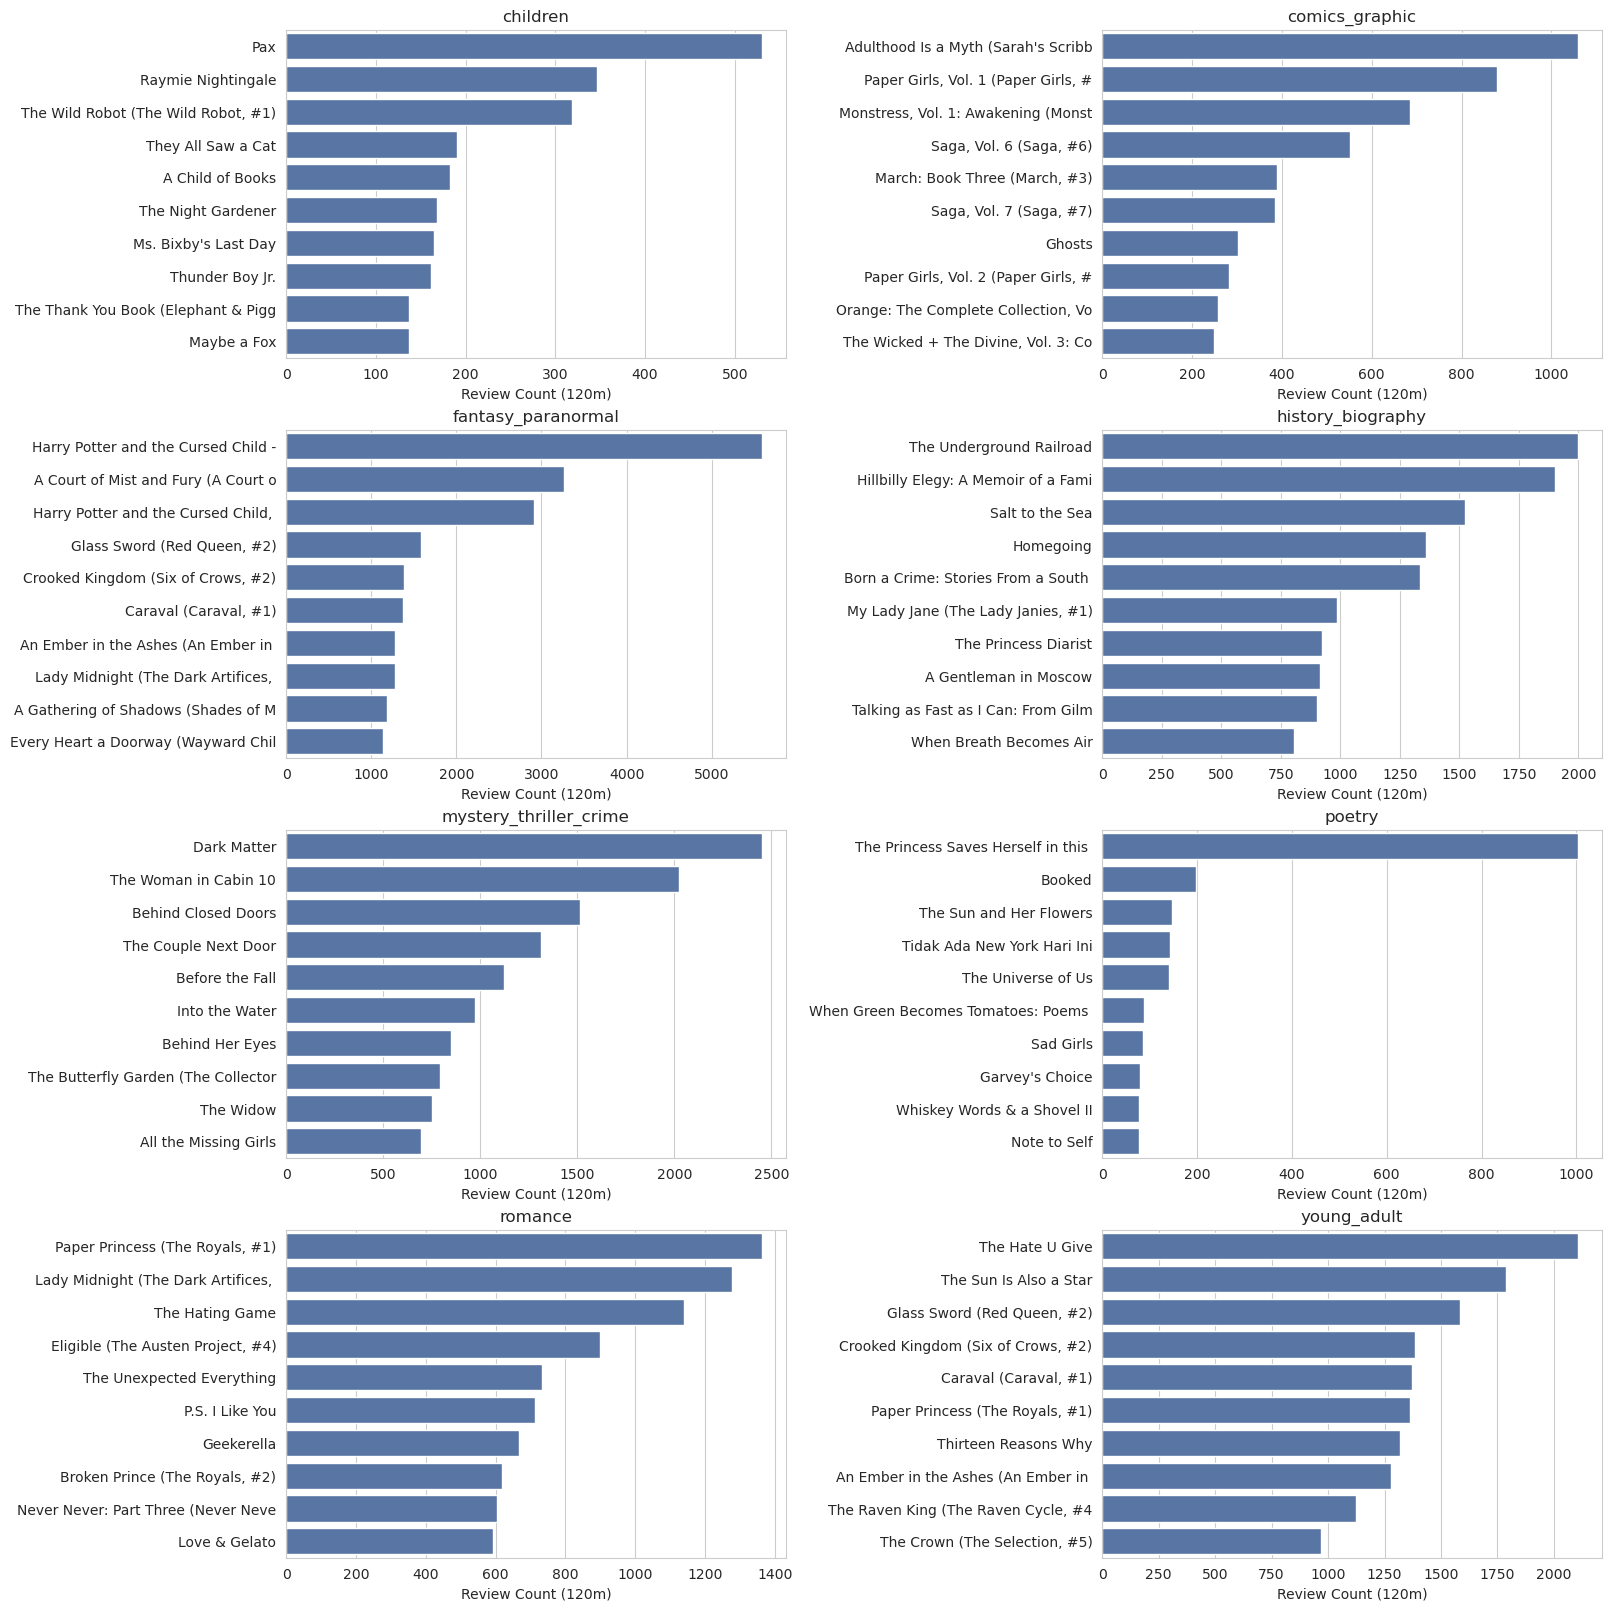

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import math

sns.set_style("whitegrid")

pdf = time_window_summary.select(
    "book_id",
    "title",
    "genre",
    "review_count_120m"
).toPandas()

pdf["review_count_120m"] = pdf["review_count_120m"].fillna(0)
pdf["title_short"] = pdf["title"].str.slice(0, 35)

genres = sorted(pdf["genre"].unique())
n = len(genres)

top_n = 10
cols = 2  
rows = math.ceil(n / cols)

fig, axes = plt.subplots(
    nrows=rows,
    ncols=cols,
    figsize=(16, 4 * rows),
    constrained_layout=True
)

axes = axes.flatten()

for ax, genre in zip(axes, genres):
    sub = pdf[pdf["genre"] == genre]
    sub_top = sub.sort_values("review_count_120m", ascending=False).head(top_n)
    sns.barplot(
        data=sub_top,
        x="review_count_120m",
        y="title_short",
        ax=ax,
        color="#4C72B0"
    )
    ax.set_title(genre, fontsize=12)
    ax.set_xlabel("Review Count (120m)")
    ax.set_ylabel("")

for ax in axes[len(genres):]:
    ax.axis("off")

plt.show()


**Finding:** Across genres, the top-performing books show very different popularity patterns. Some genres—like fantasy/paranormal, young adult, and mystery/thriller/crime—are dominated by a few extremely high-review blockbuster titles, indicating that popularity is concentrated among major series or widely recognized works. In contrast, genres such as children’s, poetry, and history/biography have top books with more moderate review counts, suggesting that popularity is more evenly distributed and not driven by single breakout hits. Overall, the charts show that what drives popularity varies by genre, with some relying on franchise strength and others reflecting broader, steadier reader interest.

## **Machine Learning Model**

### Loading prepared data

In [31]:
#loading cleand parquet data
books = spark.read.parquet("gs://qst843-team01-project/notebooks/jupyter/data/books_cleaned_parquet/")
time_window_summary = spark.read.parquet("gs://qst843-team01-project/notebooks/jupyter/data/time_window_summary_parquet/")

In [30]:
time_window_summary.count()

114455

In [33]:
time_window_summary.select(
    "book_id",
    "title",
    "genre",
    "review_count_3m",
    "avg_rating_3m"
).orderBy(F.col("review_count_3m").desc()).show(3, truncate=False)

+--------+------------------------------------------------------------------------+------------------+---------------+------------------+
|book_id |title                                                                   |genre             |review_count_3m|avg_rating_3m     |
+--------+------------------------------------------------------------------------+------------------+---------------+------------------+
|29056083|Harry Potter and the Cursed Child - Parts One and Two (Harry Potter, #8)|fantasy_paranormal|4506           |3.5013315579227697|
|29069989|Harry Potter and the Cursed Child, Parts 1 & 2 (Harry Potter, #8)       |fantasy_paranormal|2125           |3.4432941176470586|
|17927395|A Court of Mist and Fury (A Court of Thorns and Roses, #2)              |fantasy_paranormal|1399           |4.630450321658327 |
+--------+------------------------------------------------------------------------+------------------+---------------+------------------+
only showing top 3 rows



### Q6: Which book characteristics have the strongest influence on average reader ratings?

### Feature Selection

In [34]:
from pyspark.sql import functions as F

english_variants = [
    "en", "eng", "en-US", "en-GB", "en-CA", "enm"
]

books = books.withColumn(
    "language_code",
    F.when(F.col("language_code").isin(english_variants), "eng")
     .otherwise(F.col("language_code"))
)

books_un= books.filter(F.col("language_code") != "")
books_un.groupBy('language_code').count().orderBy(F.col('count').desc()).show()

+-------------+------+
|language_code| count|
+-------------+------+
|          eng|676016|
|          spa| 29049|
|          ita| 27166|
|          ger| 21512|
|          fre| 19633|
|          ind| 16698|
|          por| 13536|
|           nl|  9878|
|          ara|  8476|
|          jpn|  7105|
|          fin|  6367|
|          tur|  6007|
|          cze|  5782|
|          swe|  5652|
|          gre|  4261|
|          per|  4037|
|          pol|  3692|
|          bul|  3623|
|          dan|  2859|
|          rum|  2311|
+-------------+------+
only showing top 20 rows



This code cleans and standardizes the language field by consolidating multiple English variants (such as en, eng, en-US, en-GB, etc.) into a single category "eng". It then removes rows with empty language codes and generates a frequency table of the remaining language categories. The goal is to reduce noise, avoid splitting the same language into many small groups, and improve the reliability of later analysis or modeling that uses language as a feature.

In [35]:
f_imprts = books_un.select('text_reviews_count', 'country_code', 'language_code', 'is_ebook', 'average_rating', 'publisher',
                        'num_pages', 'publication_month', 'publication_year', 'title', 'genre', 'name_author').dropna()

This code selects the key columns needed for analysis and removes any rows with missing values. The goal is to create a clean dataset containing only complete and relevant information for later modeling.

In [36]:
from pyspark.sql import functions as F
from pyspark.sql.functions import col, regexp_extract, when
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import RegressionEvaluator

df = f_imprts
label_col = "average_rating"

numeric_features = [
    "text_reviews_count",
    "num_pages",
    "publication_year",
    "is_ebook"
]

initial_categorical_features = [
    "language_code",
    "genre",
    "name_author",
    "publisher"
]


This code selects and prepares the numeric and categorical variables needed to run a Random Forest model. These features include review counts, book attributes, and metadata such as genre, author, and publisher.

In [37]:
def convert_to_double(colname):
    return when(
        regexp_extract(col(colname), r"(\d+)", 1) != "",
        regexp_extract(col(colname), r"(\d+)", 1).cast("double")
    ).otherwise(None)

df2 = df.drop("publication_month", "title")

df2 = df2.withColumn("text_reviews_count", convert_to_double("text_reviews_count"))
df2 = df2.withColumn("num_pages", convert_to_double("num_pages"))
df2 = df2.withColumn("publication_year", convert_to_double("publication_year"))

df2 = df2.withColumn(
    "is_ebook",
    when(F.lower(col("is_ebook")) == "true", 1.0)
    .when(F.lower(col("is_ebook")) == "false", 0.0)
    .otherwise(0.0)
)

df2 = df2.withColumn(label_col, col(label_col).cast("double"))

df2 = df2.fillna(0, numeric_features)
df2 = df2.dropna(subset=[label_col])

print("After numeric cleaning, sample size:", df2.count())


After numeric cleaning, sample size: 895559


This step cleans and standardizes the numeric variables needed for the feature-importance model. It converts string-based numeric fields—such as review counts, page numbers, and publication year—into proper numeric types, transforms the ebook flag into a binary value, and ensures the target variable (average_rating) is stored as a numeric column.

In [38]:
for c in initial_categorical_features:
    df2 = df2.withColumn(c, F.trim(col(c)))
    df2 = df2.withColumn(
        c,
        when(col(c).isNull() | (col(c) == ""), "Unknown").otherwise(col(c))
    )


This step standardizes categorical features by trimming whitespace and replacing missing or empty values with a unified "Unknown" category. The goal is to ensure all categorical fields are clean and consistently formatted so they can be safely indexed and used in the Random Forest model for feature importance analysis.

In [39]:
# Top 50 Grouping
TOP_N_LANGUAGES = 50
UNIFIED_LANG_COL = "language_code_unified_english"
FINAL_LANG_COL = "language_code_grouped"

df2 = df2.withColumn(
    UNIFIED_LANG_COL,
    F.when(F.col("language_code").startswith("en"), "English")
     .otherwise(F.col("language_code"))
).drop("language_code")

language_counts = df2.groupBy(UNIFIED_LANG_COL).count()
top_languages_list = [
    row[UNIFIED_LANG_COL]
    for row in language_counts.orderBy(col("count").desc()).limit(TOP_N_LANGUAGES).collect()
]

df2 = df2.withColumn(
    FINAL_LANG_COL,
    F.when(F.col(UNIFIED_LANG_COL).isin(top_languages_list), F.col(UNIFIED_LANG_COL))
     .otherwise("Lang_Other")
).drop(UNIFIED_LANG_COL)

# Author Name Top 500 Grouping 
TOP_N_AUTHORS = 500
FINAL_AUTHOR_COL = "name_author_grouped"

author_counts = df2.groupBy("name_author").count()
top_authors_list = [
    row["name_author"]
    for row in author_counts.orderBy(col("count").desc()).limit(TOP_N_AUTHORS).collect()
]

df2 = df2.withColumn(
    FINAL_AUTHOR_COL,
    F.when(F.col("name_author").isin(top_authors_list), F.col("name_author"))
     .otherwise("Author_Other")
).drop("name_author")

# Publisher Top 100 Grouping
TOP_N_PUBLISHERS = 100
FINAL_PUBLISHER_COL = "publisher_grouped"

publisher_counts = df2.groupBy("publisher").count()
top_publishers_list = [
    row["publisher"]
    for row in publisher_counts.orderBy(col("count").desc()).limit(TOP_N_PUBLISHERS).collect()
]

df2 = df2.withColumn(
    FINAL_PUBLISHER_COL,
    F.when(F.col("publisher").isin(top_publishers_list), F.col("publisher"))
     .otherwise("Publisher_Other")
).drop("publisher")

categorical_features = [
    FINAL_LANG_COL,
    "genre",
    FINAL_AUTHOR_COL,
    FINAL_PUBLISHER_COL
]
print("Final categorical features used:", categorical_features)


Final categorical features used: ['language_code_grouped', 'genre', 'name_author_grouped', 'publisher_grouped']


This step reduces the high cardinality of categorical features by grouping languages, authors, and publishers into their top N most common values and mapping all others into an “Other” category. This simplifies the dataset, prevents sparsity, and ensures the Random Forest model can learn meaningful patterns while still retaining the major categorical signals.

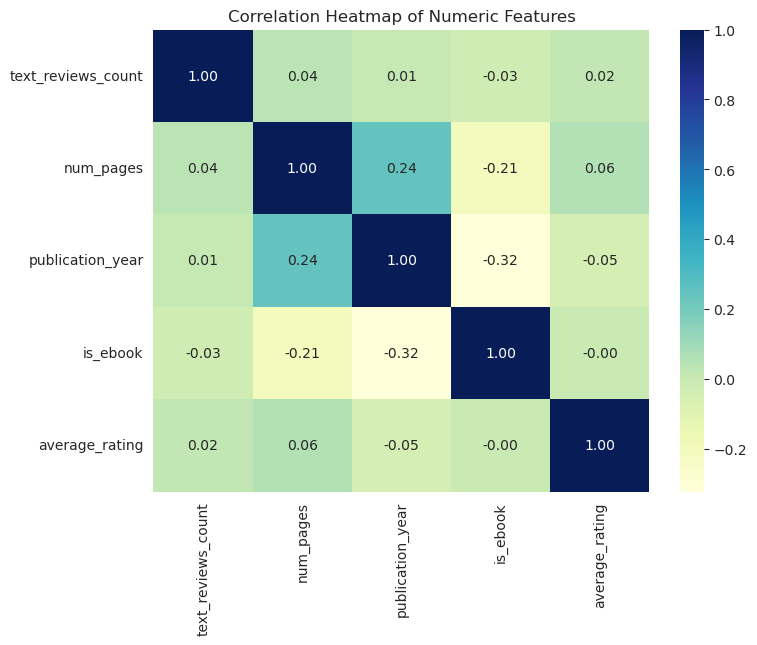

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = [
    "text_reviews_count",
    "num_pages",
    "publication_year",
    "is_ebook",
    "average_rating"
]

pdf = df2.select(cols).toPandas()

corr = pdf.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


This code calculates the correlations between the numeric features and displays them in a heatmap. The goal is to quickly see how these variables relate to each other and to the average rating.

**Finding:**
The heatmap shows that none of the numeric features has a strong relationship with average rating. All correlations are very close to zero, meaning things like page count, review count, publication year, or ebook status do not meaningfully predict a book’s rating. The numeric features mainly vary independently of rating.

The correlation heatmap shows that none of the numeric features has a strong linear relationship with average rating. This justified our decision to use a Random Forest model, which can capture non-linear and interaction effects that simple correlations cannot reveal. While the heatmap suggests weak linear signals, the Random Forest later identifies which features still contribute meaningful predictive value once combined with categorical variables and non-linear patterns.

### Random Forest

In [41]:
indexers = [
    StringIndexer(inputCol=c, outputCol=f"{c}_idx", handleInvalid="keep")
    for c in categorical_features
]

indexed_cols = [f"{c}_idx" for c in categorical_features]

assembler = VectorAssembler(
    inputCols=numeric_features + indexed_cols,
    outputCol="features"
)

rf = RandomForestRegressor(
    labelCol=label_col,
    featuresCol="features",
    numTrees=50,
    maxDepth=12,
    seed=42,
    maxBins=1024
)

pipeline = Pipeline(stages=indexers + [assembler, rf])

train_df, test_df = df2.randomSplit([0.7, 0.3], seed=42)

rf_model_pipeline = pipeline.fit(train_df)
pred = rf_model_pipeline.transform(test_df)

evaluator_rmse = RegressionEvaluator(
    labelCol=label_col,
    predictionCol="prediction",
    metricName="rmse"
)

rmse = evaluator_rmse.evaluate(pred)
print("RMSE:", rmse)


25/12/08 18:11:28 WARN DAGScheduler: Broadcasting large task binary with size 1164.4 KiB
25/12/08 18:11:36 WARN DAGScheduler: Broadcasting large task binary with size 1830.1 KiB
25/12/08 18:11:45 WARN DAGScheduler: Broadcasting large task binary with size 2.8 MiB
25/12/08 18:11:57 WARN DAGScheduler: Broadcasting large task binary with size 4.5 MiB
25/12/08 18:12:16 WARN DAGScheduler: Broadcasting large task binary with size 6.2 MiB
25/12/08 18:12:38 WARN DAGScheduler: Broadcasting large task binary with size 5.7 MiB
25/12/08 18:12:56 WARN DAGScheduler: Broadcasting large task binary with size 5.5 MiB
25/12/08 18:13:10 WARN DAGScheduler: Broadcasting large task binary with size 5.5 MiB
25/12/08 18:13:23 WARN DAGScheduler: Broadcasting large task binary with size 5.9 MiB
25/12/08 18:13:37 WARN DAGScheduler: Broadcasting large task binary with size 6.0 MiB
25/12/08 18:13:50 WARN DAGScheduler: Broadcasting large task binary with size 6.0 MiB
25/12/08 18:14:05 WARN DAGScheduler: Broadcastin

RMSE: 0.32099423239416863


We converted the cleaned categorical features into indexed numeric form using StringIndexer and combined them with the numeric variables through VectorAssembler to create a unified feature vector. A Random Forest regression model was then trained using a 70/30 train–test split, allowing us to evaluate performance (via RMSE) and later extract feature importance. This step enables us to quantify which book characteristics most strongly influence average ratings.

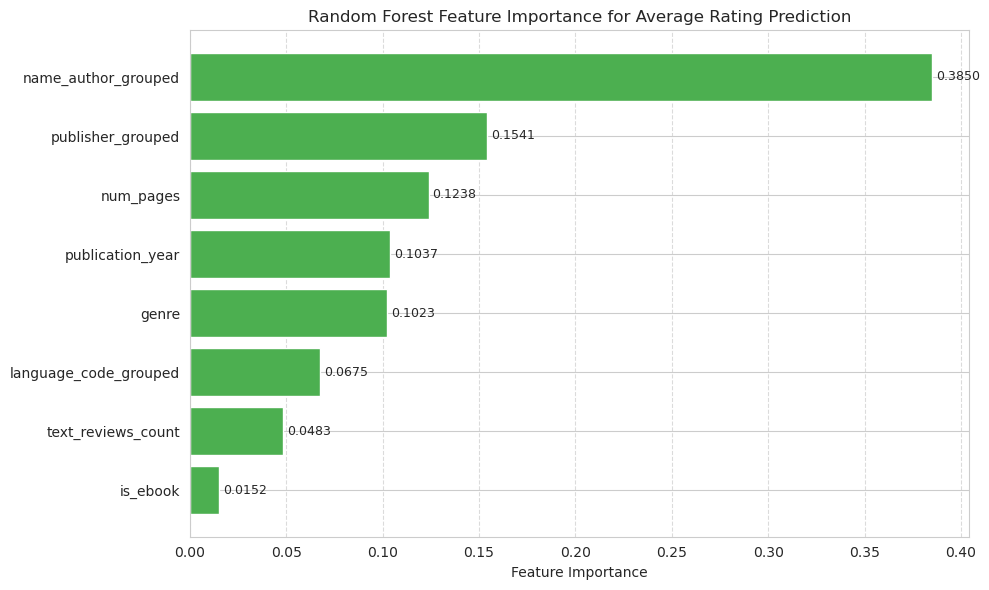

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

rf_model = rf_model_pipeline.stages[-1]
importances = rf_model.featureImportances.toArray()

feature_names = numeric_features + categorical_features

order = np.argsort(importances)[::-1]  
sorted_features = [feature_names[i] for i in order]
sorted_scores = [importances[i] for i in order]

y_pos = np.arange(len(sorted_features))

plt.figure(figsize=(10, 6))

# use your green color
bars = plt.barh(y_pos, sorted_scores, align='center', color='#4CAF50')

# add text labels
for i, bar in enumerate(bars):
    plt.text(
        bar.get_width() + 0.002,
        bar.get_y() + bar.get_height() / 2,
        f"{sorted_scores[i]:.4f}",
        va='center',
        fontsize=9
    )

plt.yticks(y_pos, sorted_features)
plt.gca().invert_yaxis()   # largest at the top

plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance for Average Rating Prediction")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


We extract the trained Random Forest model’s feature importance scores and visualize them in descending order. This horizontal bar chart highlights which numeric and categorical attributes contribute most to predicting a book’s average rating. 

The chart shows that author identity is the strongest factor affecting a book’s average rating—much more important than any other feature. Publisher also matters, but to a lesser degree. Numeric attributes like page count and publication year have moderate influence, while genre, language, and review counts play smaller roles. Whether a book is an e-book has almost no impact on its rating. Overall, ratings are driven mostly by who wrote the book rather than its format or early engagement.

### Random Forest [updated]

We decided to remove the author and publisher variables and rebuild the model because these factors can introduce bias. Many authors and publishers become well known only after a book succeeds, which means their popularity often reflects the outcome of success rather than a driver of it. If we kept these variables, the model might mistakenly attribute performance to reputation that did not actually exist at the time of release. By excluding them, the model focuses on features that are truly available early on, such as language, genre, page count, and early engagement signals. This allows us to evaluate the underlying drivers of book performance in a more realistic and interpretable way.

In [ ]:
df = f_imprts

label_col = "average_rating"

numeric_features = [
    "text_reviews_count",
    "num_pages",
    "publication_year",
    "is_ebook"
]

initial_categorical_features = [
    "language_code",
    "genre"
]


def convert_to_double(colname):
    return when(
        regexp_extract(col(colname), r"(\d+)", 1) != "",
        regexp_extract(col(colname), r"(\d+)", 1).cast("double")
    ).otherwise(None)

# Drop unused columns (publication_month, title, name_author, publisher)
df2 = df.drop("publication_month", "title", "name_author", "publisher")

df2 = df2.withColumn("text_reviews_count", convert_to_double("text_reviews_count"))
df2 = df2.withColumn("num_pages", convert_to_double("num_pages"))
df2 = df2.withColumn("publication_year", convert_to_double("publication_year"))

df2 = df2.withColumn(
    "is_ebook",
    when(F.lower(col("is_ebook")) == "true", 1.0)
    .when(F.lower(col("is_ebook")) == "false", 0.0)
    .otherwise(0.0)
)

# Label and Missing Value Handling
df2 = df2.withColumn(label_col, col(label_col).cast("double"))

df2 = df2.fillna(0, numeric_features)



for c in initial_categorical_features:
    df2 = df2.withColumn(c, F.trim(col(c)))
    df2 = df2.withColumn(
        c,
        when(col(c).isNull() | (col(c) == ""), "Unknown").otherwise(col(c))
    )

df2 = df2.dropna(subset=[label_col])

print(f"Final usable sample size: {df2.count()}")

TOP_N_LANGUAGES = 50
UNIFIED_LANG_COL = "language_code_unified_english"
FINAL_LANG_COL = "language_code_grouped"

df2 = df2.withColumn(
    UNIFIED_LANG_COL,
    F.when(F.col("language_code").startswith("en"), "English")
     .otherwise(F.col("language_code"))
).drop("language_code")

language_counts = df2.groupBy(UNIFIED_LANG_COL).count()
top_languages_list = [
    row[UNIFIED_LANG_COL]
    for row in language_counts.orderBy(col("count").desc()).limit(TOP_N_LANGUAGES).collect()
]

df2 = df2.withColumn(
    FINAL_LANG_COL,
    F.when(F.col(UNIFIED_LANG_COL).isin(top_languages_list), F.col(UNIFIED_LANG_COL)).otherwise("Lang_Other")
).drop(UNIFIED_LANG_COL)

categorical_features = [
    FINAL_LANG_COL, # "language_code_grouped"
    "genre"
]
print(f"Final categorical features used: {categorical_features}")


indexers = [
    StringIndexer(inputCol=c, outputCol=f"{c}_idx", handleInvalid="keep")
    for c in categorical_features
]

indexed_cols = [f"{c}_idx" for c in categorical_features]

assembler = VectorAssembler(
    inputCols=numeric_features + indexed_cols,
    outputCol="features"
)

rf = RandomForestRegressor(
    labelCol=label_col,
    featuresCol="features",
    numTrees=50,
    maxDepth=12,
    seed=42,
    maxBins=64 
)

pipeline = Pipeline(stages=indexers + [assembler, rf])

train_df, test_df = df2.randomSplit([0.7, 0.3], seed=42)

rf_model_pipeline = pipeline.fit(train_df)
pred = rf_model_pipeline.transform(test_df)

evaluator_rmse = RegressionEvaluator(
    labelCol=label_col,
    predictionCol="prediction",
    metricName="rmse"
)


print(f"RMSE: {evaluator_rmse.evaluate(pred)}")

Final usable sample size: 895559


Final categorical features used: ['language_code_grouped', 'genre']


25/12/08 18:16:49 WARN DAGScheduler: Broadcasting large task binary with size 1302.9 KiB
25/12/08 18:16:58 WARN DAGScheduler: Broadcasting large task binary with size 2.4 MiB
25/12/08 18:17:09 WARN DAGScheduler: Broadcasting large task binary with size 4.3 MiB
25/12/08 18:17:22 WARN DAGScheduler: Broadcasting large task binary with size 1098.5 KiB
25/12/08 18:17:24 WARN DAGScheduler: Broadcasting large task binary with size 7.8 MiB
25/12/08 18:17:41 WARN DAGScheduler: Broadcasting large task binary with size 1972.8 KiB
25/12/08 18:17:44 WARN DAGScheduler: Broadcasting large task binary with size 13.6 MiB
25/12/08 18:18:02 WARN DAGScheduler: Broadcasting large task binary with size 3.3 MiB
25/12/08 18:18:07 WARN DAGScheduler: Broadcasting large task binary with size 22.9 MiB
25/12/08 18:18:28 WARN DAGScheduler: Broadcasting large task binary with size 5.3 MiB


RMSE: 0.33411053705565186


This code builds a Random Forest model to identify which book features influence average ratings. Unlike the previous version of our model, we intentionally removed author and publisher fields because these attributes often reflect reputation formed after a book becomes successful, which could introduce hindsight bias. By focusing only on intrinsic book attributes such as genre, language, page count, review volume, publication year, and ebook format, the model provides a clearer view of how early and fundamental features relate to a book’s rating. We then index the categorical variables, assemble all features, train the model using a 70/30 split, and evaluate performance using RMSE.

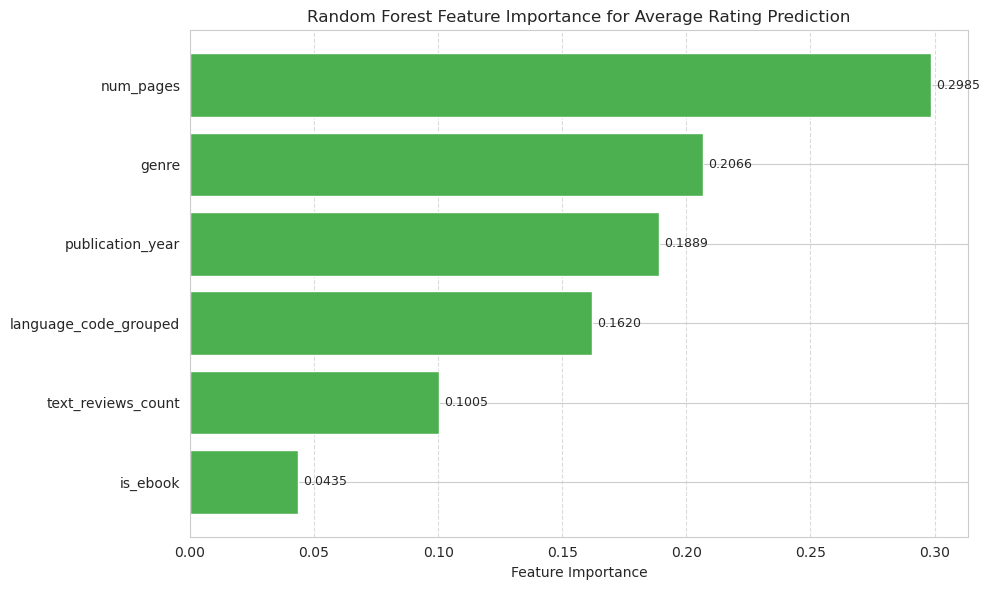

In [51]:
import numpy as np
import matplotlib.pyplot as plt

rf_model = rf_model_pipeline.stages[-1]
importances = rf_model.featureImportances.toArray()

feature_names = numeric_features + categorical_features

order = np.argsort(importances)[::-1]  
sorted_features = [feature_names[i] for i in order]
sorted_scores = [importances[i] for i in order]

y_pos = np.arange(len(sorted_features))

plt.figure(figsize=(10, 6))

# use your green color
bars = plt.barh(y_pos, sorted_scores, align='center', color='#4CAF50')

# add text labels
for i, bar in enumerate(bars):
    plt.text(
        bar.get_width() + 0.002,
        bar.get_y() + bar.get_height() / 2,
        f"{sorted_scores[i]:.4f}",
        va='center',
        fontsize=9
    )

plt.yticks(y_pos, sorted_features)
plt.gca().invert_yaxis()   # largest at the top

plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance for Average Rating Prediction")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


After removing author- and publisher-related variables, page count emerges as the strongest predictor, suggesting that longer books tend to receive slightly higher ratings, possibly because they offer more depth or attract more engaged readers. Genre is the second most influential factor, indicating that some categories systematically receive higher or lower ratings. Publication year also has a meaningful impact, reflecting evolving reader expectations or shifts in writing trends over time. Language differences show moderate influence, while early text review counts and ebook format contribute only marginally. 

### Q7: How well do our regression model predict eventual book popularity from early reviews?

### LinearRegression

In [52]:
from pyspark.sql import functions as F
from pyspark.ml import Pipeline
from pyspark.ml.feature import (
    StringIndexer, OneHotEncoder, VectorAssembler, StandardScaler
)
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

df_raw = time_window_summary

df_filtered = df_raw.filter(
    (F.col("review_count_3m") +
     F.col("review_count_6m") +
     F.col("review_count_9m") +
     F.col("review_count_12m")) >= 20
).cache()

short_term_features = [
    "review_count_3m",  "avg_rating_3m",
    "review_count_6m",  "avg_rating_6m",
    "review_count_9m",  "avg_rating_9m",
    "review_count_12m", "avg_rating_12m",
    "review_count_18m", "avg_rating_18m",
    "review_count_24m", "avg_rating_24m",
    "published_days_ago"
]

genre_indexer = StringIndexer(
    inputCol="genre",
    outputCol="genre_idx",
    handleInvalid="keep"
)

genre_encoder = OneHotEncoder(
    inputCols=["genre_idx"],
    outputCols=["genre_vec"]
)

def build_lr_pipeline(label_col):
    assembler = VectorAssembler(
        inputCols=short_term_features + ["genre_vec"],
        outputCol="raw_features"
    )

    scaler = StandardScaler(
        inputCol="raw_features",
        outputCol="features",
        withMean=True,
        withStd=True
    )

    lr = LinearRegression(
        featuresCol="features",
        labelCol=label_col,
        predictionCol="prediction",
        maxIter=100,
        regParam=0.1
    )

    return Pipeline(stages=[
        genre_indexer,
        genre_encoder,
        assembler,
        scaler,
        lr
    ])


25/12/08 18:19:39 WARN CacheManager: Asked to cache already cached data.


We built a linear regression pipeline that uses early engagement signals (review counts, ratings across 3–24 months, and genre) to predict a book’s long-term popularity. The pipeline indexes/encodes genre, assembles and scales all features, and trains a regularized linear model to forecast 5-year and 10-year review counts.

#### Five year Model

We filtered books with at least 5 years of data and a valid 60-month review count, filled missing early-period values, and trained the 5-year linear regression model. Performance was evaluated using RMSE and R², and predictions were compared against actual long-term review counts.

In [53]:
five_df = df_filtered.filter(F.col("published_days_ago") >= 5 * 365)
five_df = five_df.filter(F.col("review_count_60m").isNotNull())
five_df = five_df.na.fill(0, short_term_features + ["review_count_60m"])

pipeline_5 = build_lr_pipeline("review_count_60m")

train_5, test_5 = five_df.randomSplit([0.8, 0.2], seed=42)
model_5 = pipeline_5.fit(train_5)
pred_5 = model_5.transform(test_5)

rmse_5 = RegressionEvaluator(
    labelCol="review_count_60m", predictionCol="prediction", metricName="rmse"
).evaluate(pred_5)

r2_5 = RegressionEvaluator(
    labelCol="review_count_60m", predictionCol="prediction", metricName="r2"
).evaluate(pred_5)

print("===== 5-year Linear Regression =====")
print("RMSE:", rmse_5)
print("R2:", r2_5)

lr_5 = model_5.stages[-1]
print("Intercept (5y):", lr_5.intercept)
print("Num Coefficients (5y):", len(lr_5.coefficients))

pred_5.select("book_id","title","review_count_60m","prediction") \
      .show(10, truncate=False)


===== 5-year Linear Regression =====
RMSE: 0.729855229842063
R2: 0.9999131021922982
Intercept (5y): 27.46757228432627
Num Coefficients (5y): 21
+--------+---------------------------------------------------------------+----------------+------------------+
|book_id |title                                                          |review_count_60m|prediction        |
+--------+---------------------------------------------------------------+----------------+------------------+
|12799435|Imprudence (The Custard Protocol, #2)                          |87              |87.48886854009102 |
|15993203|The Dark Days Club (Lady Helen, #1)                            |312             |305.97460579582713|
|16131489|The Last Star (The 5th Wave, #3)                               |462             |462.85255367898355|
|17196508|The Defender: How the Legendary Black Newspaper Changed America|13              |13.242798072279935|
|17735579|A Drop of Night                                                |64   

#### Ten year Model

Then we filtered books with at least 10 years of data and a valid 120-month review count, filled missing early-period features, and trained the 10-year regression model. Model performance (RMSE/R²) and predicted vs. actual long-term review counts were then evaluated to assess forecasting accuracy.

In [89]:
ten_df = df_filtered.filter(F.col("published_days_ago") >= 10 * 365)
ten_df = ten_df.filter(F.col("review_count_120m").isNotNull())
ten_df = ten_df.na.fill(0, short_term_features + ["review_count_120m"])

pipeline_10 = build_lr_pipeline("review_count_120m")

train_10, test_10 = ten_df.randomSplit([0.8, 0.2], seed=42)
model_10 = pipeline_10.fit(train_10)
pred_10 = model_10.transform(test_10)

rmse_10 = RegressionEvaluator(
    labelCol="review_count_120m", predictionCol="prediction", metricName="rmse"
).evaluate(pred_10)

r2_10 = RegressionEvaluator(
    labelCol="review_count_120m", predictionCol="prediction", metricName="r2"
).evaluate(pred_10)

print("===== 10-year Linear Regression =====")
print("RMSE:", rmse_10)
print("R2:", r2_10)

lr_10 = model_10.stages[-1]
print("Intercept (10y):", lr_10.intercept)
print("Num Coefficients (10y):", len(lr_10.coefficients))

pred_10.select("book_id","title","review_count_120m","prediction") \
       .show(10, truncate=False)


===== 10-year Linear Regression =====
RMSE: 1.1448823642187527
R2: 0.9955478285202373
Intercept (10y): 15.785714285714292
Num Coefficients (10y): 19
+--------+--------------------------------------------------+-----------------+------------------+
|book_id |title                                             |review_count_120m|prediction        |
+--------+--------------------------------------------------+-----------------+------------------+
|26094420|The Secret Loves of Geek Girls                    |33               |31.75715566384321 |
|27278986|The Walking Dead, Issue #149                      |12               |12.211863102764363|
|27804345|A Forced Silence (Zero Hour, #1)                  |14               |14.420258742422908|
|27974501|Stripped (Travesty, #2)                           |17               |17.29900146943528 |
|26070021|Unveil Me (The Jaded Series, #3)                  |17               |17.745026109676008|
|27799890|Maelstrom (Whyborne & Griffin, #7)               

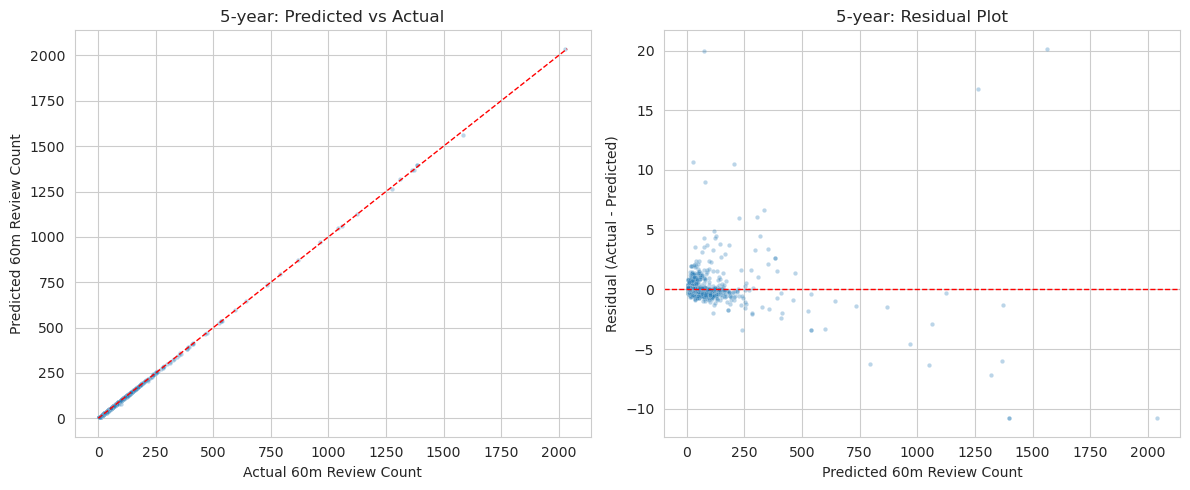

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# ========= 5-year: predicted vs actual & residuals =========
pdf5 = pred_5.select("review_count_60m", "prediction").toPandas()
pdf5["residual"] = pdf5["review_count_60m"] - pdf5["prediction"]

plt.figure(figsize=(12, 5))

# 1) Predicted vs Actual
plt.subplot(1, 2, 1)
sns.scatterplot(
    data=pdf5, x="review_count_60m", y="prediction", alpha=0.3, s=10
)
max_val = max(pdf5["review_count_60m"].max(), pdf5["prediction"].max())
plt.plot([0, max_val], [0, max_val], "r--", linewidth=1)
plt.xlabel("Actual 60m Review Count")
plt.ylabel("Predicted 60m Review Count")
plt.title("5-year: Predicted vs Actual")

# 2) Residual plot
plt.subplot(1, 2, 2)
sns.scatterplot(
    data=pdf5, x="prediction", y="residual", alpha=0.3, s=10
)
plt.axhline(0, color="red", linestyle="--", linewidth=1)
plt.xlabel("Predicted 60m Review Count")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("5-year: Residual Plot")

plt.tight_layout()
plt.show()


This code evaluates the 5-year prediction model by visualizing how well the predicted review counts match the actual values. The first scatter plot compares predictions against true 60-month review counts, where points close to the diagonal line indicate strong accuracy. The second plot shows residuals (actual minus predicted) to check whether errors are randomly distributed. Together, these visuals help us quickly assess model fit and detect any systematic bias in the predictions.

The 5-year evaluation plots show that our model predicts long-term review counts with very high accuracy. In the Predicted vs. Actual plot, most points lie almost exactly on the 45-degree reference line, indicating the model captures the overall scale of review growth well. The residual plot further confirms this: errors are small, mostly centered around zero, and show no systematic pattern. A few books with very large long-term review counts create slightly larger residuals, but overall the model performs consistently across the dataset. These results suggest that early-period review behavior is highly informative for forecasting 5-year outcomes.

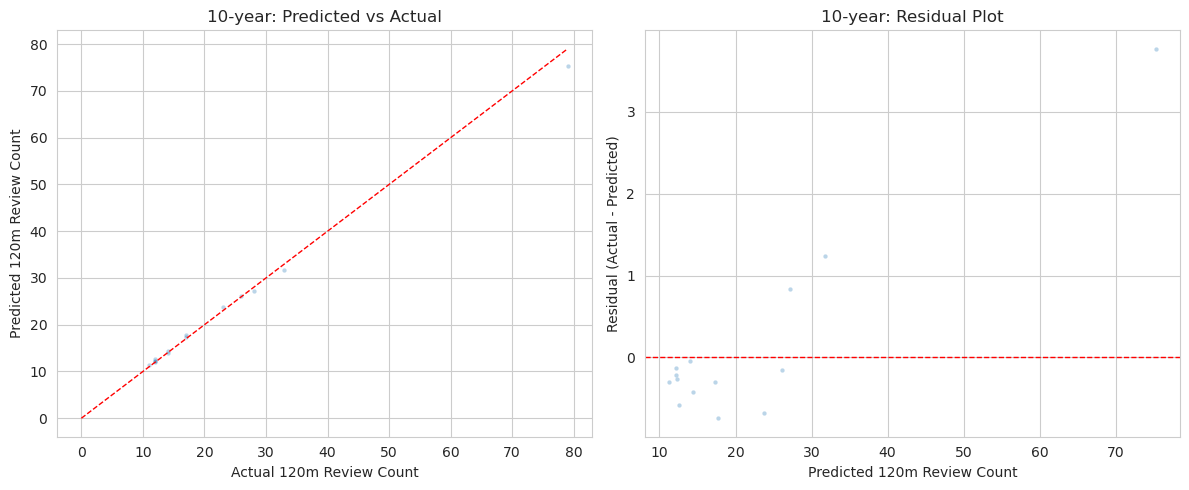

In [56]:
# ========= 10-year: predicted vs actual & residuals =========
pdf10 = pred_10.select("review_count_120m", "prediction").toPandas()
pdf10["residual"] = pdf10["review_count_120m"] - pdf10["prediction"]

plt.figure(figsize=(12, 5))

# 1) Predicted vs Actual
plt.subplot(1, 2, 1)
sns.scatterplot(
    data=pdf10, x="review_count_120m", y="prediction", alpha=0.3, s=10
)
max_val = max(pdf10["review_count_120m"].max(), pdf10["prediction"].max())
plt.plot([0, max_val], [0, max_val], "r--", linewidth=1)
plt.xlabel("Actual 120m Review Count")
plt.ylabel("Predicted 120m Review Count")
plt.title("10-year: Predicted vs Actual")

# 2) Residual plot
plt.subplot(1, 2, 2)
sns.scatterplot(
    data=pdf10, x="prediction", y="residual", alpha=0.3, s=10
)
plt.axhline(0, color="red", linestyle="--", linewidth=1)
plt.xlabel("Predicted 120m Review Count")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("10-year: Residual Plot")

plt.tight_layout()
plt.show()


This code evaluates the 10-year prediction model by visualizing how well the predicted review counts match the actual values. The first scatter plot compares predictions against true 60-month review counts, where points close to the diagonal line indicate strong accuracy. The second plot shows residuals (actual minus predicted) to check whether errors are randomly distributed. Together, these visuals help us quickly assess model fit and detect any systematic bias in the predictions.The 10-year evaluation plots show that the model captures overall long-term review trends reasonably well, but with more variability compared to the 5-year model. In the Predicted vs. Actual plot, the points generally follow the 45-degree reference line, indicating that the model is directionally correct, but the wider spread reflects greater uncertainty over a decade-long horizon. The residual plot supports this: although most residuals remain close to zero, a few books show larger deviations, suggesting that long-term outcomes become harder to predict from early signals alone. Overall, the 10-year model still performs well given the limited data available at this horizon, but its accuracy is naturally lower than the 5-year model.

The 10-year evaluation plots show that the model captures overall long-term review trends reasonably well, but with more variability compared to the 5-year model. In the Predicted vs. Actual plot, the points generally follow the 45-degree reference line, indicating that the model is directionally correct, but the wider spread reflects greater uncertainty over a decade-long horizon. The residual plot supports this: although most residuals remain close to zero, a few books show larger deviations, suggesting that long-term outcomes become harder to predict from early signals alone. Overall, the 10-year model still performs well given the limited data available at this horizon, but its accuracy is naturally lower than the 5-year model.

### Q8: According to our model, which books published less than 5 years ago will be most popular 10 years after publishing?

In [88]:
from pyspark.sql import functions as F

#Filtering Time Window Summary to only show books that weren't published for at least 10 years by the time of the datascrape - pre-2019
prediction_candidates = (
    time_window_summary
    .filter(F.col("review_count_60m").isNotNull())
    .filter(F.col("review_count_120m").isNotNull())
    .filter(F.col("review_count_120m") == F.col("review_count_60m"))
)

# Fill any missing early windows
prediction_candidates = candidates.na.fill(0)

# Apply Trained Regression Model
predictions_10yr = model_10.transform(prediction_candidates)

# Select Columns to Display
results = predictions_10yr.select(
    "title",
    F.year("publication_date").alias("publication_year"),
    F.col("prediction").alias("predicted_10yr_review_count")
).orderBy(F.col("predicted_10yr_review_count").desc())


#Show the top 10 most popular book by prediction

pd.set_option('display.max_colwidth', None)

top10_df = results.select("title", "publication_year").limit(10).toPandas()

top10_df

,title,publication_year
0,"Harry Potter and the Cursed Child - Parts One and Two (Harry Potter, #8)",2016
1,"A Court of Mist and Fury (A Court of Thorns and Roses, #2)",2016
2,"Harry Potter and the Cursed Child, Parts 1 & 2 (Harry Potter, #8)",2016
3,Dark Matter,2016
4,The Hate U Give,2017
5,The Woman in Cabin 10,2016
6,The Underground Railroad,2016
7,Hillbilly Elegy: A Memoir of a Family and Culture in Crisis,2016
8,The Sun Is Also a Star,2016
9,"Glass Sword (Red Queen, #2)",2016


This code applies the trained Regression Model to books that had not been published for at least 10 years at the time of the datascrape. Filtering was achieved by finding all books where the 60 month review count was the same as the 120 month review count. This is an assumption that it would be highly unlikely for a book to receive zero new reviews in 5 years. 
Then we applied the model and showed the top 10 books in descending order to show the books from this dataset to be the most popular 5 years later.

This model proves to be accurate as Harry Potter and the Cursed Child and the A Court of Thorns and Roses series are current best sellers, Dark Matter was recently adapted into a tv series for Apple TV, The Hate U Give became a major motion picture in 2018, The Woman in Cabin 10 is releasing on Netflix later this year.

## **Conclusions and Recommendations**

**Actionable Findings:**

The analysis shows that book outcomes are predictable in meaningful ways, and the most practical signals come from reputation and early engagement. Ratings are influenced most strongly by the author and publisher, while intrinsic factors like genre, page count, and publication year play smaller roles unless reputation information is removed. Goodreads ratings also tend to cluster tightly between 3.8 and 4.2, so even small differences reflect real quality differences. Genre does not change ratings much but it strongly affects popularity, with fantasy, young adult, and thrillers consistently drawing bigger audiences than poetry, biography, or children’s literature. These genre patterns have also shifted over time, with modern readers showing increasing interest in speculative and character-driven fiction. A small group of authors captures a disproportionate share of total reader engagement, though the highest-rated authors tend to be steady niche performers rather than the most popular names. The most powerful finding is that early review activity is an excellent predictor of long-term success. Review counts in the first few months correlate almost perfectly with totals five and even ten years later, and review growth stabilizes after year three, leaving little room for late surges. Numeric features alone do not explain rating patterns, so non-linear models and categorical data are needed to capture the real drivers of performance. Together, these insights suggest that early momentum, author branding, and genre-based audience expectations should guide marketing strategy, forecasting, and catalog planning.


**Limitations:**

As with any analysis, it’s important to recognize where the data and findings may fall short. Our Goodreads data provide a large and detailed dataset, but its user base tends to be highly engaged and may not reflect all book buyers, casual readers, or consumers. This introduces some selection bias, as the platform’s most active users might have different preferences from the broader market. Additionally, there are other digital communities for readers to share their activities and reviews such as through product reviews on bookstore or ecommerce websites, Reddit, or online book clubs.


Data quality is another consideration. Because all the information comes from user entries, there can be inconsistencies: authors or publishers listed in different ways, missing fields, and even occasional duplicates.

The dataset also has its own imbalances. Certain genres and languages are much more prominent, which means our models may be more accurate for those groups and less reliable for others with fewer titles or reviews. We’ve used fixed time windows to track review counts, but the pace at which different books gather attention can vary; for some, momentum builds slowly, while others see quick bursts of interest. This can be reflective of organic consumer interest overtime or outcomes linked to startegic marketing campaigns.

Finally, it’s worth noting that our analysis doesn’t account for outside influences, such as major awards or movie adaptations, which can drive popularity but are not captured in the data. For example, when a movie based on a book is released, the book typically experiences a correlated surge of sales regardless of publishing date.

Overall, the findings help highlight meaningful trends, but they do not explain everything. These insights should guide decision-making, rather than serve as the final word on what makes a book successful.

#### **What should publishers and authors focus on early in a book’s launch?**

Our results show that early traction strongly shapes long-term success. To give a book the best chance of growing over 5–10 years, publishers and authors should focus on a few key areas during the launch:

**1. Build early review volume:** Early review counts are the strongest predictor of long-term popularity. Encouraging readers to leave reviews in the first months is essential.

**2. Maintain positive early ratings:** While volume matters most, strong early ratings help sustain momentum and improve discoverability.

**3. Position the book clearly within its genre:** Genre influences long-term performance, so correct tagging and audience targeting are important.

**4. Keep visibility high in the first year:** Books that stay quiet early rarely gain traction later, so ongoing light marketing helps.

**5. Ensure strong book fundamentals before launch:** Features like page count, metadata quality, and overall presentation also play a role in long-term outcomes.

#### **Next Steps**

**1. Strengthen the long-term prediction model：**
Our 5-year and 10-year models perform strongly, but they rely heavily on early review counts. As a next step, we can test simple transformations (such as log-scaling) or add more early-window features to improve stability, especially for books with extremely high review volumes.

**2. Compare performance across genres：**
Genre has a clear influence on both rating and long-term review patterns. Building separate models for major genre groups will help us understand which categories are easier or harder to predict and whether early traction behaves differently across genres.

**3. Refine the Random Forest feature analysis：**
After removing author and publisher to avoid reputation effects, the Random Forest model highlights structural book attributes such as page count, language, and publication year. Next, we can explore whether these feature patterns shift for newer vs. older books or within specific genres.

**4. Extend the modeling framework：**
In addition to linear regression and random forest, we plan to test logistic regression and a few other simple models to see whether they offer better classification or prediction performance. This will give us a more complete comparison across modeling approaches.

**5. Turn predictions into publisher-relevant insights：**
Using our long-term forecasts, we can identify slow-burn books, front-loaded books, and other meaningful segments. These insights can help publishers make decisions about marketing investment, early promotion, and long-term positioning of different titles.

## Big Data Challenges Faced

**1. JSON files were large and slow to load：** The original JSON data was both heavy and deeply nested, making Spark I/O inefficient. Converting the dataset to Parquet significantly improved read speed and overall processing performance.

**2. High-cardinality features created sparse and unstable models：** Fields such as author, publisher, and language had thousands of unique values. These could not be used directly in modeling, so we applied Top-N grouping to reduce cardinality and maintain model stability.

**3. Spark memory pressure and large task binaries：** While training Random Forest and regression models, Spark produced warnings about large task binaries and memory stress. We mitigated this by reducing unused columns, filtering data, and being cautious with caching.

**4. Inconsistent formatting and missing values across key fields：** Many numeric columns (e.g., page count, text review count, publication year) were stored as strings and contained missing or invalid entries. Additional cleaning and type conversion were required before modeling.

**5. Inconsistent categorical encoding：** Several categorical fields contained redundant or inconsistent labels—for example, English appeared as en, eng, en-US, enm, etc. Standardizing these values was necessary to prevent fragmentation in the models.

**6. Large dataset leading to slow training time：** With over 600k records, training Random Forest and regression models was computationally expensive. We reduced training time by dropping unneeded columns, applying dimensionality reduction, and leveraging train/test splits.

## **References**

McAuley, J. (n.d.). Goodreads Datasets. University of California, San Diego. Retrieved from https://cseweb.ucsd.edu/~jmcauley/datasets/goodreads.html

The Apache Software Foundation. (n.d.). Pandas API on Spark (PySpark). Retrieved from https://spark.apache.org/pandas-on-spark/

The Apache Software Foundation. (n.d.). PySpark.pandas.DataFrame API Reference. Retrieved from https://spark.apache.org/docs/latest/api/python/reference/pyspark.pandas/api/pyspark.pandas.DataFrame.html

The Seaborn Development Team. (n.d.). An introduction to seaborn. Retrieved from https://seaborn.pydata.org/tutorial/introduction.html

## **Generative AI Statement**
Generative AI Disclosure Statement

In completing this project, we utilized Generative AI tools to assist with several aspects of our work. Below is a detailed account of how these tools were used:

* Brainstorming: ChatGPT assisted in brainstorming ideas during the early stages of the project, helping us develop, refine, and structure our analytical approach.

* Coding and Debugging: We used ChatGPT to help debug and resolve issues in our Spark code, as well as to optimize algorithms, improving overall performance and computational efficiency.

* Data Processing and Visualization Guidance: ChatGPT provided guidance on performing data transformations, computing key metrics, and designing effective visualizations using Spark, which supported our ability to interpret and present findings clearly.

* Grammar Checks: Grammarly was used to review the written content for grammatical accuracy and clarity, ensuring the final report met professional communication standards.

Our team carefully reviewed, edited, and validated all AI-generated content to ensure its accuracy, relevance, and compliance with academic integrity standards.